<a href="https://colab.research.google.com/github/nadirawijaya/Skripsi/blob/main/Skripsi_Nadira_V3A.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
  <h1><b>SKRIPSI</b></h1>
  <h2><b>Pengaruh Seleksi Fitur IGWO terhadap Kinerja Random Forest, CatBoost, dan XGBoost<br>untuk Klasifikasi Penyakit Monkeypox Berdasarkan Gejala</b></h2>


  <br><br>
  <b>Diajukan oleh:</b><br>
  Nadira Putri Wijaya<br>
  2106635190<br>
  <a href="mailto:nadira.putri11@ui.ac.id">nadira.putri11@ui.ac.id</a>
  <br><br>

  <b>Dosen Pembimbing:</b><br>
  Dra. Bevina Desjwiandra Handari, M.Sc., Ph.D.
  <br><br><br>

  <b>Program Studi Sarjana Matematika</b><br>
  Departemen Matematika FMIPA Universitas Indonesia<br>
  Depok, Desember 2025
</center>


In [ ]:
# =============================================================================
# STEP 1: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# =============================================================================
# STEP 1A: INSTALASI PUSTAKA YANG DIBUTUHKAN
# =============================================================================
import sys

# Cek apakah kode dijalankan di Google Colab untuk instalasi otomatis
IN_COLAB = 'google.colab' in sys.modules
if IN_COLAB:
    print("📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...")
    # Instalasi dalam mode senyap (-q) untuk output yang bersih
    !pip install pandas numpy matplotlib seaborn scikit-learn imblearn chardet catboost xgboost -q
    print("✅ Paket instalasi selesai!")
else:
    print("📘 Menjalankan di lingkungan lokal. Pastikan semua paket sudah terinstal.")

# =============================================================================
# STEP 1B: INISIALISASI PIPELINE & MANAJEMEN PUSTAKA
# =============================================================================

# === 1.1 MANAJEMEN PUSTAKA & SISTEM ===
import warnings
import sys
import time
import re

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chardet

from IPython.display import display, HTML

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, classification_report)

from xgboost import XGBClassifier
from catboost import CatBoostClassifier # Sekarang ini tidak akan error

# Mengelola peringatan agar output lebih bersih
warnings.filterwarnings('ignore')

# === 1.2 HEADER & PENGECEKAN LINGKUNGAN ===
print("🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...")
print("="*80)

# Cek lagi untuk memastikan modul files diimpor jika di Colab
if 'google.colab' in sys.modules:
    from google.colab import files

print("\n📚 Semua pustaka berhasil diimpor.")

# === 1.3 KONFIGURASI VISUALISASI & DISPLAY ===
plt.style.use('seaborn-v0_8-whitegrid')  # Gaya plot modern & konsisten
sns.set_palette("viridis")               # Palet warna default yang menarik
pd.set_option('display.max_columns', 50) # Tampilkan hingga 50 kolom di output
pd.set_option('display.width', 120)      # Lebar tampilan output Pandas

print("🎨 Pengaturan visualisasi dan display telah diterapkan.")
print("="*80)
print("✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.")
print("="*80)

📦 Lingkungan Google Colab terdeteksi. Menginstal paket yang dibutuhkan...
✅ Paket instalasi selesai!
🚀 Menginisialisasi Pipeline Preprocessing Monkeypox...

📚 Semua pustaka berhasil diimpor.
🎨 Pengaturan visualisasi dan display telah diterapkan.
✅ STEP 1 SELESAI: Pipeline siap untuk memuat data.


🚀 Memulai Pipeline Data Loading & Cleaning...

📤 Silakan upload CSV Anda...


Saving MonkeyPox Dataset Skripsi.csv to MonkeyPox Dataset Skripsi.csv
🔄 Loading CSV: 'MonkeyPox Dataset Skripsi.csv'...
✅ Berhasil load. Bentuk awal: (500, 50)

🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️
INVESTIGATIVE DATA CLEANING & FEATURE SELECTION PIPELINE
🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️🕵️

--- TAHAP 1: Pembersihan Awal ---
✅ Nama kolom dibersihkan.
✅ 0 baris duplikat dihapus.

--- TAHAP 2: Investigasi Kebocoran Data (Crosstab Analysis) ---


Menganalisis setiap fitur terhadap target untuk menemukan 'Perfect Predictors'.


--- Analisis untuk Fitur: 'sex' ---
diagnosing  negative  positive
sex                           
female            96       145
male             107       152
✔️ Fitur 'sex' terlihat aman.

--- Analisis untuk Fitur: 'transmission_rank' ---
diagnosing         negative  positive
transmission_rank                    
Index                    39        31
Isolated                  7         9
Secondary                14        45
Tertiary                 40        39
index                    16        39
isolated                 62        84
secondary                25        50
✔️ Fitur 'transmission_rank' terlihat aman.

--- Analisis untuk Fitur: 'country_of_acquisition' ---
diagnosing              negative  positive
country_of_acquisition                    
Argentina                      2         6
Australia                      9         0
Bangladesh                     0         3
Belgium                        3         0
Benin                          0         3
Cambodia       

Membuat heatmap untuk melihat hubungan antar fitur (setelah di-encode).

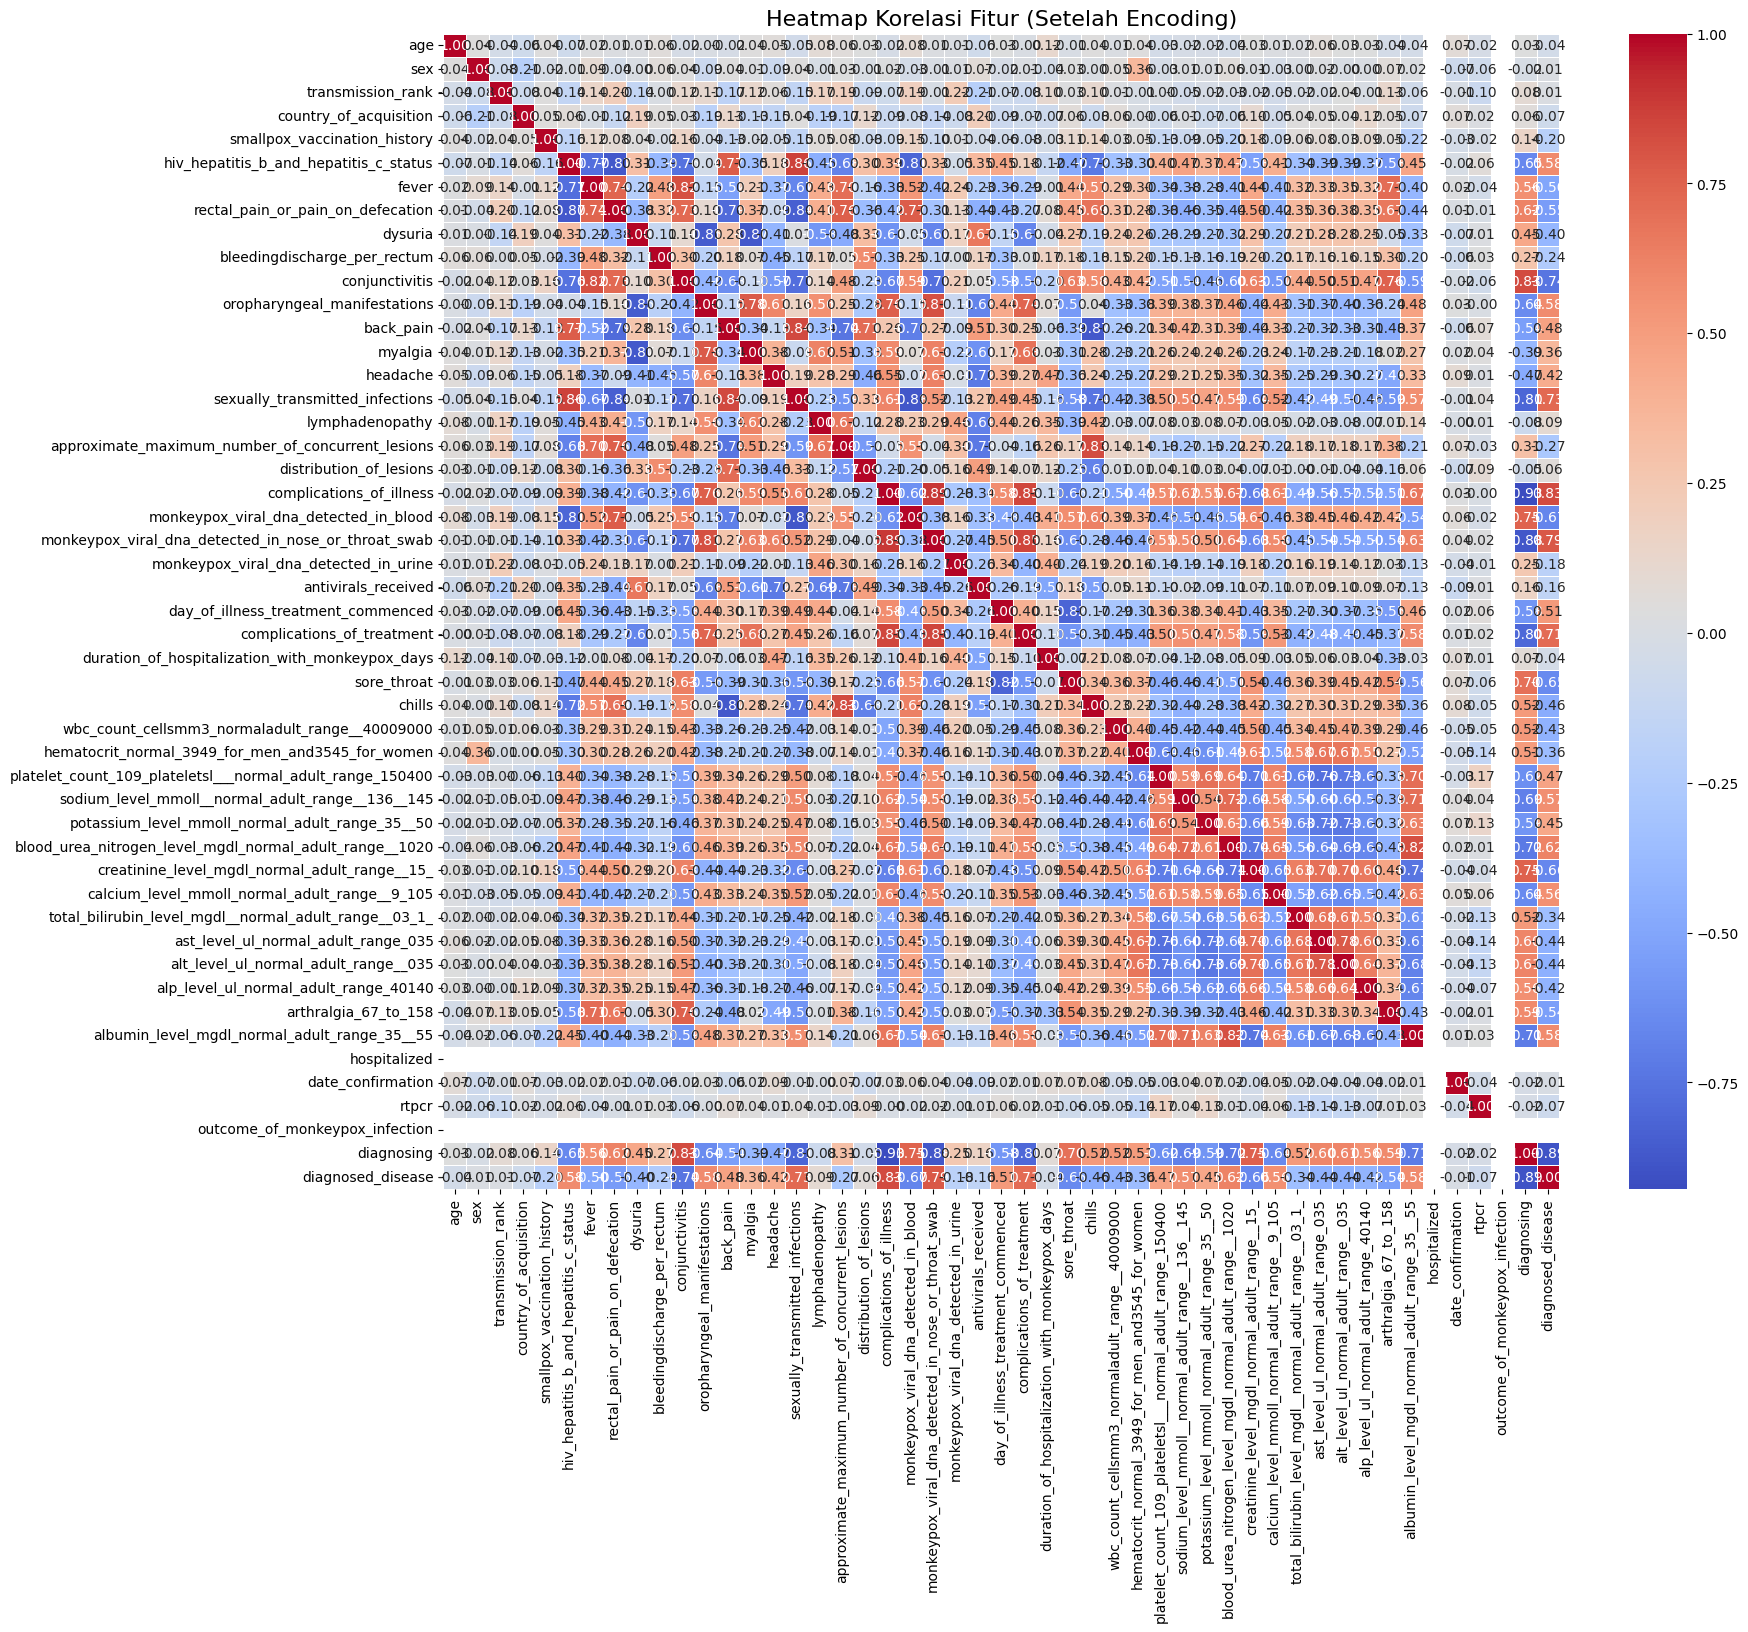


--- TAHAP 4: Membuat Whitelist Final & Membersihkan Data ---
Whitelist final dibuat secara dinamis.
Total fitur awal: 49
Fitur bocor yang dihapus: 24
Total fitur final: 25

📊 Final Overview after Investigative Cleaning:
   - Final data shape: (500, 25)


,age,sex,transmission_rank,myalgia,lymphadenopathy,complications_of_illness,duration_of_hospitalization_with_monkeypox_days,sore_throat,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,...,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,outcome_of_monkeypox_infection,diagnosing
0,49,female,isolated,yes,yes,Low mood and emotional lability. Ulcerated ing...,26,yes,22135,48,...,8.2,1.0,41,37,147,10.0,2.5,yes,Full recovery,positive
1,52,female,index,none,none,"Deep tissue abscesses, severe pain, and low mood",15,yes,14026,48,...,7.3,1.1,42,37,145,9.8,1.9,yes,Full recovery,positive
2,76,male,Index,yes,yes,"Deep tissue abscesses, severe pain, and low mood",27,yes,26742,56,...,6.1,1.0,38,42,149,11.0,2.8,yes,Full recovery,positive
3,42,female,Secondary,none,none,"Conjunctivitis, painful disruption of thumbnai...",35,yes,24688,49,...,8.3,1.6,43,41,143,6.6,2.0,yes,Full recovery,positive
4,67,male,Isolated,yes,yes,Ulcerated inguinal lesion with delayed healing,39,yes,20346,52,...,7.7,1.4,43,38,143,7.0,2.7,yes,Full recovery,positive



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
   - Target (y) ditetapkan sebagai: 'diagnosing'

   - X_initial shape: (500, 24)
   - y_initial shape: (500,)

✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅
STEP 2: INVESTIGATIVE DATA CLEANING COMPLETED SUCCESSFULLY!
✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅✅


In [1]:
# =============================================================================
# STEP 2: INVESTIGATIVE DATA CLEANING & FEATURE SELECTION
# =============================================================================
import pandas as pd
import numpy as np
import sys
import re
import chardet
from IPython.display import display, Markdown
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

# --- Pastikan modul Colab dikenali ---
if 'google.colab' in sys.modules:
    from google.colab import files

# === 2.1 LOADER & CLEANER CLASSES (UNCHANGED) ===
class EnhancedCSVLoader:
    """Loader CSV yang sudah disederhanakan dan lebih tangguh."""
    def load_csv(self, file_path):
        print(f"🔄 Loading CSV: '{file_path}'...")
        encoding = 'utf-8'
        try:
            with open(file_path, 'rb') as f:
                encoding = chardet.detect(f.read(30000))['encoding']
        except Exception:
            print("   - Warning: Gagal deteksi encoding, default ke utf-8.")
        try:
            df = pd.read_csv(file_path, encoding=encoding)
            print(f"✅ Berhasil load. Bentuk awal: {df.shape}")
            return df
        except Exception:
            try:
                print(f"   - Gagal dengan encoding '{encoding}', mencoba fallback 'latin1'...")
                df = pd.read_csv(file_path, encoding='latin1')
                print(f"✅ Berhasil load dengan fallback 'latin1'. Bentuk awal: {df.shape}")
                return df
            except Exception as e2:
                print(f"❌ Gagal load: {e2}"); return None

# === 2.2 INVESTIGATIVE DATA CLEANER (NEW LOGIC) ===
class InvestigativeDataCleaner:
    """
    Membersihkan data dengan pendekatan investigatif untuk secara sistematis
    mengidentifikasi dan menghapus fitur penyebab data leakage.
    """
    def __init__(self, df):
        self.df = df.copy()
        self.leaky_features = []
        self.target = 'diagnosing'

    def run_pipeline(self):
        print("\n" + "🕵️"*40 + "\nINVESTIGATIVE DATA CLEANING & FEATURE SELECTION PIPELINE\n" + "🕵️"*40)
        self._initial_cleaning()
        self._investigate_features()
        self._visualize_correlation()
        final_df = self._apply_final_whitelist()
        return final_df

    def _initial_cleaning(self):
        print("\n--- TAHAP 1: Pembersihan Awal ---")
        # Clean column names
        cleaned_columns = {col: re.sub(r'[^a-z0-9_]', '', col.strip().lower().replace(' ', '_')) for col in self.df.columns}
        self.df.rename(columns=cleaned_columns, inplace=True)
        print("✅ Nama kolom dibersihkan.")

        # Drop non-predictive IDs
        id_cols = ['id', 'patient_id']
        self.df.drop(columns=[c for c in id_cols if c in self.df.columns], inplace=True, errors='ignore')

        # Handle duplicates
        n_dupes = self.df.duplicated().sum()
        self.df.drop_duplicates(keep='first', inplace=True)
        print(f"✅ {n_dupes} baris duplikat dihapus.")
        return self

    def _investigate_features(self):
        print("\n--- TAHAP 2: Investigasi Kebocoran Data (Crosstab Analysis) ---")
        display(Markdown("Menganalisis setiap fitur terhadap target untuk menemukan 'Perfect Predictors'."))

        potential_features = self.df.drop(columns=[self.target], errors='ignore').columns

        for feature in potential_features:
            if self.df[feature].dtype == 'object' or self.df[feature].nunique() < 15: # Cek fitur kategorikal
                print(f"\n--- Analisis untuk Fitur: '{feature}' ---")
                crosstab = pd.crosstab(self.df[feature], self.df[self.target])
                print(crosstab)

                # Logika untuk mendeteksi kebocoran: Jika ada sel bernilai 0 di crosstab,
                # itu berarti ada kategori fitur yang 100% berkorelasi dengan satu kelas target.
                if (crosstab == 0).any().any():
                    print(f"🚨 DITEMUKAN POTENSI LEAKAGE! Fitur '{feature}' adalah perfect predictor.")
                    self.leaky_features.append(feature)
                else:
                    print(f"✔️ Fitur '{feature}' terlihat aman.")

        print("\n" + "="*50)
        if self.leaky_features:
            print(f"🔎 Hasil Investigasi: Fitur yang akan dihapus karena leakage -> {self.leaky_features}")
        else:
            print("🔎 Hasil Investigasi: Tidak ada fitur penyebab leakage yang terdeteksi.")
        print("="*50)

    def _visualize_correlation(self):
        print("\n--- TAHAP 3: Visualisasi Korelasi (Heatmap) ---")
        display(Markdown("Membuat heatmap untuk melihat hubungan antar fitur (setelah di-encode)."))

        df_encoded = self.df.copy()
        for col in df_encoded.columns:
            if df_encoded[col].dtype == 'object':
                df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

        plt.figure(figsize=(18, 15))
        sns.heatmap(df_encoded.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=.5)
        plt.title('Heatmap Korelasi Fitur (Setelah Encoding)', fontsize=16)
        plt.show()

    def _apply_final_whitelist(self):
        print("\n--- TAHAP 4: Membuat Whitelist Final & Membersihkan Data ---")
        initial_features = list(self.df.columns)

        # Whitelist adalah semua fitur awal DIKURANGI fitur yang bocor
        final_whitelist = [feat for feat in initial_features if feat not in self.leaky_features]

        print(f"Whitelist final dibuat secara dinamis.")
        print(f"Total fitur awal: {len(initial_features)}")
        print(f"Fitur bocor yang dihapus: {len(self.leaky_features)}")
        print(f"Total fitur final: {len(final_whitelist)}")

        final_df = self.df[final_whitelist].copy()

        print("\n📊 Final Overview after Investigative Cleaning:")
        print(f"   - Final data shape: {final_df.shape}")
        display(final_df.head())
        return final_df

# =============================================================================
# MAIN FUNCTION & EXECUTION
# =============================================================================
def main_data_loader_and_cleaner():
    print("🚀 Memulai Pipeline Data Loading & Cleaning..."); print("="*80)
    df = None
    if 'google.colab' in sys.modules:
        try:
            print("\n📤 Silakan upload CSV Anda..."); uploaded = files.upload()
            if not uploaded: print("🚫 Tidak ada file diupload."); return None
            file_name = next(iter(uploaded))
            df = EnhancedCSVLoader().load_csv(file_name)
        except Exception as e: print(f"💥 Error saat upload: {e}"); return None
    else:
        file_name = 'MonkeyPox Dataset Skripsi.csv' # Ganti dengan path file Anda jika perlu
        print(f"\n📂 Running di environment lokal. Membaca file '{file_name}'")
        df = EnhancedCSVLoader().load_csv(file_name)

    if df is not None:
        if "Monkeypox" in df.columns:
            df.rename(columns={"Monkeypox": "diagnosing"}, inplace=True)
        # Jalankan cleaner investigatif yang baru
        return InvestigativeDataCleaner(df).run_pipeline()
    return None

# --- Jalankan pipeline utama ---
df_final_step2 = main_data_loader_and_cleaner()

# =============================================================================
# PEMISAHAN FITUR & TARGET
# =============================================================================
if df_final_step2 is not None:
    print("\n" + "🎯"*40); print("FINALIZING STEP 2: SEPARATING FEATURES (X) AND TARGET (y)"); print("🎯"*40)
    TARGET_COLUMN = 'diagnosing'
    if TARGET_COLUMN in df_final_step2.columns:
        X_initial = df_final_step2.drop(columns=[TARGET_COLUMN], errors='ignore')
        y_initial = df_final_step2[TARGET_COLUMN]
        print(f"   - Target (y) ditetapkan sebagai: '{TARGET_COLUMN}'")
        print(f"\n   - X_initial shape: {X_initial.shape}"); print(f"   - y_initial shape: {y_initial.shape}")
        print("\n" + "✅"*60); print("STEP 2: INVESTIGATIVE DATA CLEANING COMPLETED SUCCESSFULLY!"); print("✅"*60)
    else:
        print(f"🛑 GAGAL: Kolom target '{TARGET_COLUMN}' tidak ditemukan setelah pembersihan.")
else:
    print("\n" + "🛑"*60); print("STEP 2 FAILED. Periksa error di atas sebelum melanjutkan."); print("🛑"*60)

In [2]:
# Menampilkan 10 baris pertama dari tabel fitur (X_initial)
display(X_initial.head(10))

# Menampilkan 10 baris pertama dari tabel target (y_initial)
display(y_initial.head(10))

,age,sex,transmission_rank,myalgia,lymphadenopathy,complications_of_illness,duration_of_hospitalization_with_monkeypox_days,sore_throat,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,...,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,total_bilirubin_level_mgdl__normal_adult_range__03_1_,ast_level_ul_normal_adult_range_035,alt_level_ul_normal_adult_range__035,alp_level_ul_normal_adult_range_40140,arthralgia_67_to_158,albumin_level_mgdl_normal_adult_range_35__55,hospitalized,outcome_of_monkeypox_infection
0,49,female,isolated,yes,yes,Low mood and emotional lability. Ulcerated ing...,26,yes,22135,48,...,2.2,8.20,1.0,41,37,147,10.0,2.5,yes,Full recovery
1,52,female,index,none,none,"Deep tissue abscesses, severe pain, and low mood",15,yes,14026,48,...,1.8,7.30,1.1,42,37,145,9.8,1.9,yes,Full recovery
2,76,male,Index,yes,yes,"Deep tissue abscesses, severe pain, and low mood",27,yes,26742,56,...,1.5,6.10,1.0,38,42,149,11.0,2.8,yes,Full recovery
3,42,female,Secondary,none,none,"Conjunctivitis, painful disruption of thumbnai...",35,yes,24688,49,...,1.7,8.30,1.6,43,41,143,6.6,2.0,yes,Full recovery
4,67,male,Isolated,yes,yes,Ulcerated inguinal lesion with delayed healing,39,yes,20346,52,...,1.8,7.70,1.4,43,38,143,7.0,2.7,yes,Full recovery
5,74,female,Index,yes,yes,none,13,none,21414,48,...,1.6,8.80,1.8,43,39,141,7.6,2.9,yes,Full recovery
6,78,male,Tertiary,yes,yes,Pruritis and contact dermatitis from cleaning ...,22,yes,14649,58,...,2.1,8.50,1.2,39,38,141,6.8,2.7,yes,Full recovery
7,44,female,Secondary,yes,none,Low mood,10,yes,11998,56,...,1.7,8.30,1.4,43,41,145,11.0,2.4,yes,Full recovery
8,50,male,Index,none,none,"Deep tissue abscesses, severe pain, and low mood",15,yes,20875,60,...,2.1,6.90,1.3,41,40,148,9.8,2.1,yes,Full recovery
9,18,male,Tertiary,yes,none,NaN,20,yes,8173,46,...,0.6,9.56,1.0,21,6,89,8.0,4.5,yes,Full recovery


,diagnosing
0,positive
1,positive
2,positive
3,positive
4,positive
5,positive
6,positive
7,positive
8,positive
9,negative


In [3]:
# =============================================================================
# STEP 3: DATA SPLITTING (TRAIN-VALIDATION-TEST)
# =============================================================================
from sklearn.model_selection import train_test_split  # Library untuk membagi dataset
import pandas as pd  # Library untuk manipulasi data
import numpy as np  # Library untuk operasi numerik

def split_data(X, y, train_size=0.7, val_size=0.15, test_size=0.15, random_state=42):
    """
    Splits the data into training, validation, and testing sets with stratification
    to maintain the same class proportion in each set.

    # Parameters:
    - X: DataFrame berisi fitur
    - y: Series target
    - train_size, val_size, test_size: Proporsi pembagian data
    - random_state: Seed untuk reproducibility

    # Returns:
    - X_train, X_validation, X_test, y_train, y_validation, y_test
    """
    print("\n" + "🔪"*40)
    print("STEP 3: SPLITTING DATA INTO TRAIN, VALIDATION, & TEST SETS")
    print("🔪"*40)

    # Check jika proporsi total = 1
    if not np.isclose(train_size + val_size + test_size, 1.0):
        print("🛑 ERROR: The sum of train, validation, and test sizes must be 1.0.")
        return None

    # --- First split ---
    # Pisahkan test set dari data (test_size = 0.15, stratify menjaga distribusi kelas target)
    X_train_val, X_test, y_train_val, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state, stratify=y
    )

    # --- Second split ---
    # Pisahkan training dan validation dari sisa data (train_val)
    val_proportion = val_size / (train_size + val_size)  # hitung proporsi relatif validation
    X_train, X_validation, y_train, y_validation = train_test_split(
        X_train_val, y_train_val, test_size=val_proportion, random_state=random_state, stratify=y_train_val
    )

    # Konfirmasi bahwa split berhasil
    print("✅ Data splitting successful.")
    print("\n" + "-"*40)
    print("Data Shapes:")
    print(f"   - Training Set   (X_train, y_train):      {X_train.shape}, {y_train.shape}  (~{train_size:.0%})")  # Tampilkan ukuran training
    print(f"   - Validation Set (X_validation, y_validation): {X_validation.shape}, {y_validation.shape}  (~{val_size:.0%})")  # Ukuran validation
    print(f"   - Test Set       (X_test, y_test):          {X_test.shape}, {y_test.shape}  (~{test_size:.0%})")  # Ukuran test
    print("-"*40)

    # --- Verifikasi stratifikasi ---
    # Menampilkan distribusi target di setiap set untuk memastikan representasi seimbang
    print("\nTarget Distribution Check:")
    print(f"   - Original:     \n{y.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Training Set:   \n{y_train.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Validation Set: \n{y_validation.value_counts(normalize=True).sort_index().to_string()}")
    print(f"   - Test Set:       \n{y_test.value_counts(normalize=True).sort_index().to_string()}")

    return X_train, X_validation, X_test, y_train, y_validation, y_test

# =============================================================================
# EXECUTION FOR STEP 3
# =============================================================================
# Step ini dijalankan setelah Step 2, menggunakan `X_initial` dan `y_initial`

if 'X_initial' in locals() and 'y_initial' in locals():
    # Split data dengan rasio 70/15/15 (train/validation/test)
    X_train, X_validation, X_test, y_train, y_validation, y_test = split_data(
        X_initial, y_initial, train_size=0.70, val_size=0.15, test_size=0.15
    )

    # Konfirmasi sukses split
    print("\n" + "🎉"*60)
    print("STEP 3 SUCCESS: Data has been split into three distinct sets.")
    print("The pipeline should now process X_train, X_validation, and X_test consistently in the next steps.")
    print("="*80)
else:
    print("🛑 Could not run Step 3 because `X_initial` and `y_initial` from Step 2 were not found.")  # Error handling



🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
STEP 3: SPLITTING DATA INTO TRAIN, VALIDATION, & TEST SETS
🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪🔪
✅ Data splitting successful.

----------------------------------------
Data Shapes:
   - Training Set   (X_train, y_train):      (350, 24), (350,)  (~70%)
   - Validation Set (X_validation, y_validation): (75, 24), (75,)  (~15%)
   - Test Set       (X_test, y_test):          (75, 24), (75,)  (~15%)
----------------------------------------

Target Distribution Check:
   - Original:     
diagnosing
negative    0.406
positive    0.594
   - Training Set:   
diagnosing
negative    0.405714
positive    0.594286
   - Validation Set: 
diagnosing
negative    0.413333
positive    0.586667
   - Test Set:       
diagnosing
negative    0.4
positive    0.6

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 3 SUCCESS: Data has been split into three distinct sets.
The pipeline should now process X_train, X_validation, and X_test consistently in t


🚀 STARTING STEP 4: VALUE STANDARDIZATION

✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
STEP 4: STANDARDIZING CATEGORICAL VALUES
✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨✨
1. Cleaning and standardizing values in Train, Validation, and Test sets...
   ✅ Standardization rules applied to 8 categorical columns.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
COMPREHENSIVE STANDARDIZATION REPORT (Based on Training Set)
📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋
Found 7 column(s) with values that were standardized.

------------------------------------------------------------
🔎 Detailed Report for Column: 'sex'
   - Unique values reduced from 2 to 2.


,Before,After
sex,,
female,178,0
male,172,0
female,0,178
male,0,172


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


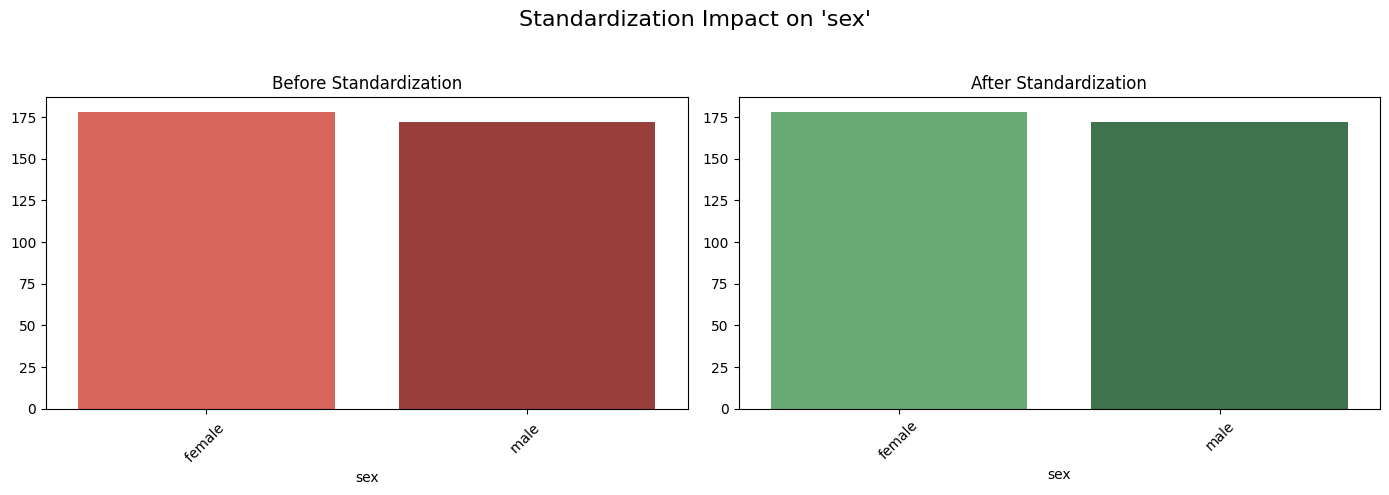


------------------------------------------------------------
🔎 Detailed Report for Column: 'transmission_rank'
   - Unique values reduced from 7 to 4.


,Before,After
transmission_rank,,
isolated,95,106
Tertiary,55,0
secondary,54,99
Index,54,0
Secondary,45,0
index,36,90
Isolated,11,0
tertiary,0,55


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


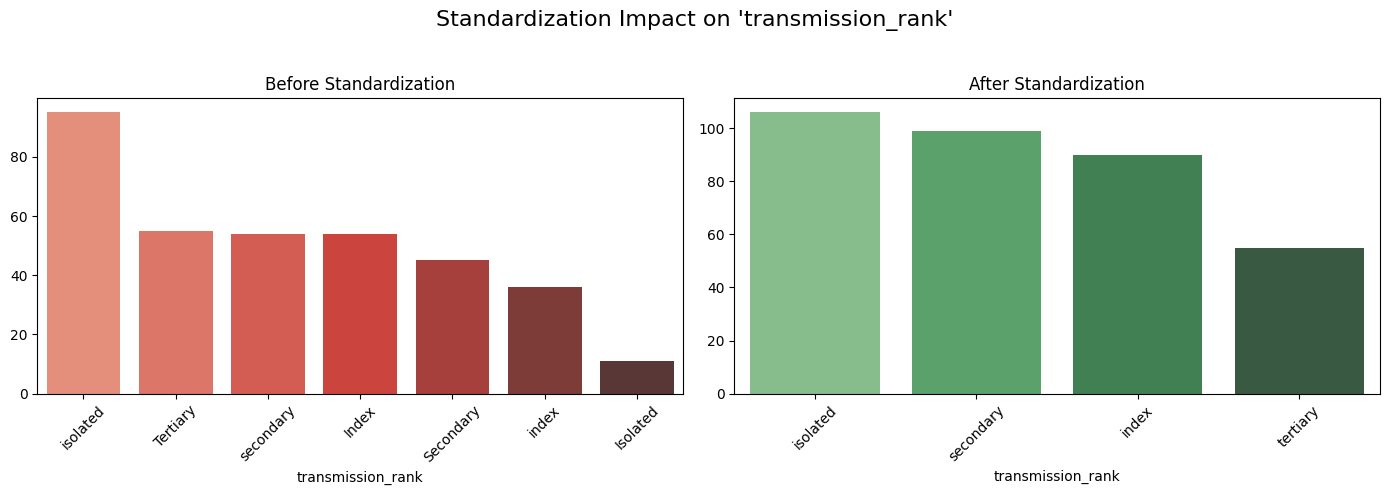


------------------------------------------------------------
🔎 Detailed Report for Column: 'myalgia'
   - Unique values reduced from 2 to 2.


,Before,After
myalgia,,
yes,280,280
none,70,0
no,0,70


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


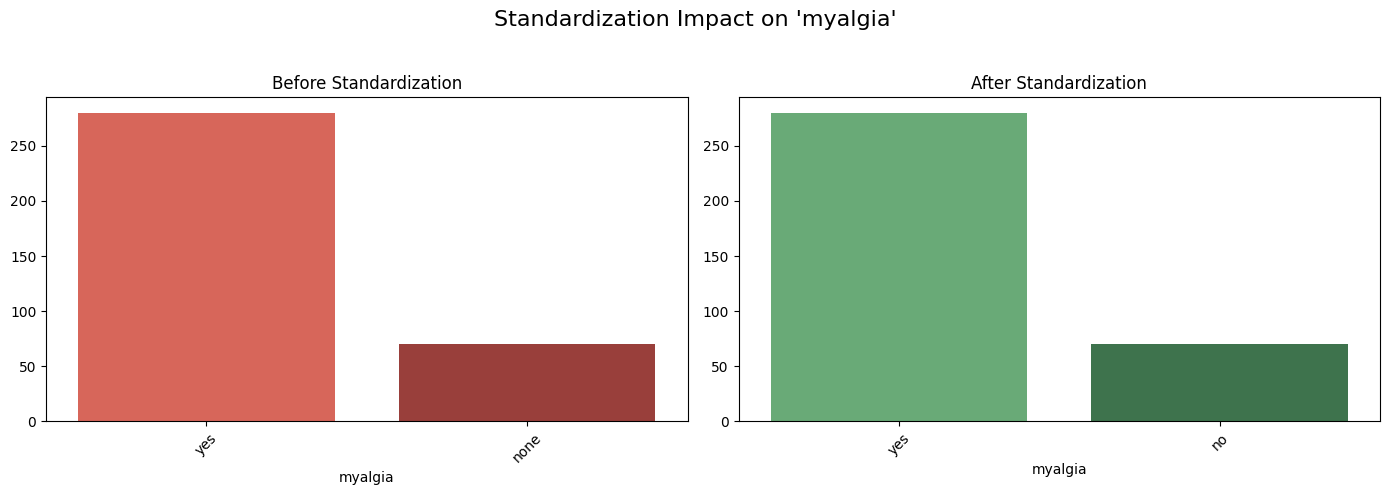


------------------------------------------------------------
🔎 Detailed Report for Column: 'lymphadenopathy'
   - Unique values reduced from 2 to 2.


,Before,After
lymphadenopathy,,
yes,228,228
none,122,0
no,0,122


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


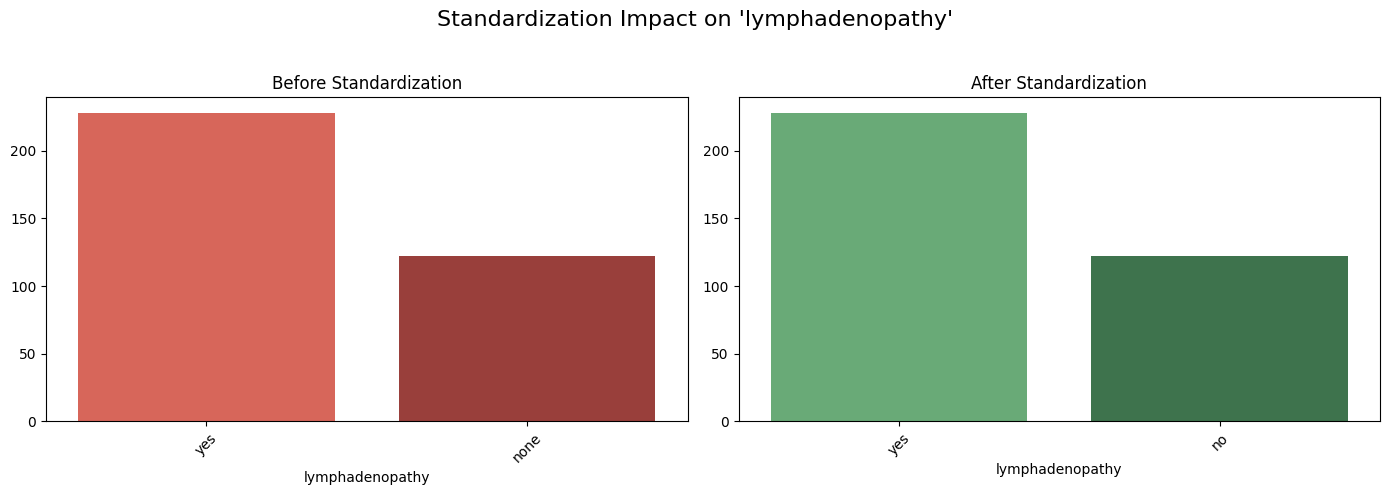


------------------------------------------------------------
🔎 Detailed Report for Column: 'complications_of_illness'
   - Unique values reduced from 7 to 8.


,Before,After
complications_of_illness,,
Low mood and emotional lability. Ulcerated inguinal lesion with delayed healing,95,0
"Deep tissue abscesses, severe pain, and low mood",67,0
"Conjunctivitis, painful disruption of thumbnail from subungual lesion",28,0
Low mood,9,0
Ulcerated inguinal lesion with delayed healing,4,0
Pruritis and contact dermatitis from cleaning products,3,0
none,2,0
nan,0,142
low mood and emotional lability. ulcerated inguinal lesion with delayed healing,0,95


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:101: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorat

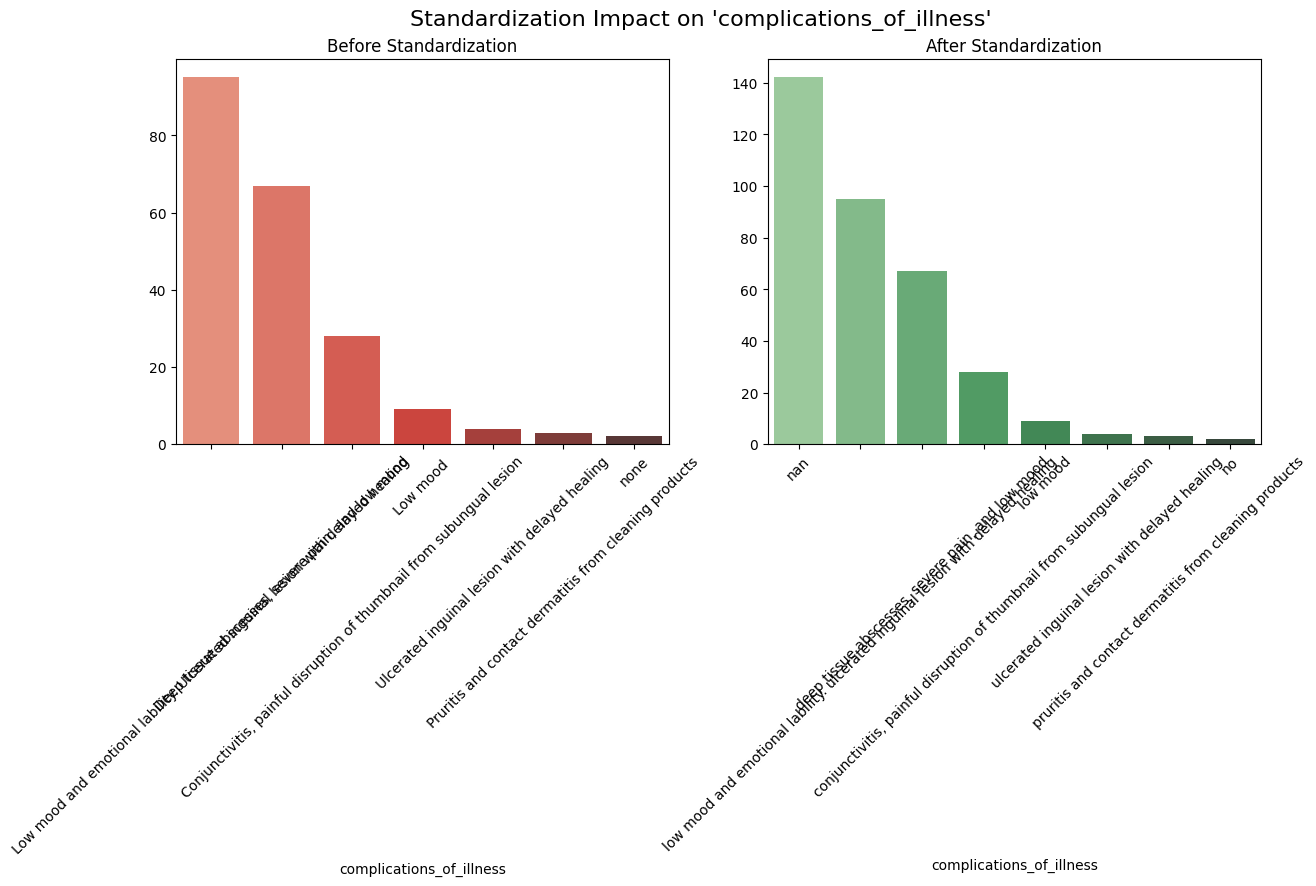


------------------------------------------------------------
🔎 Detailed Report for Column: 'sore_throat'
   - Unique values reduced from 2 to 2.


,Before,After
sore_throat,,
yes,254,254
none,96,0
no,0,96


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


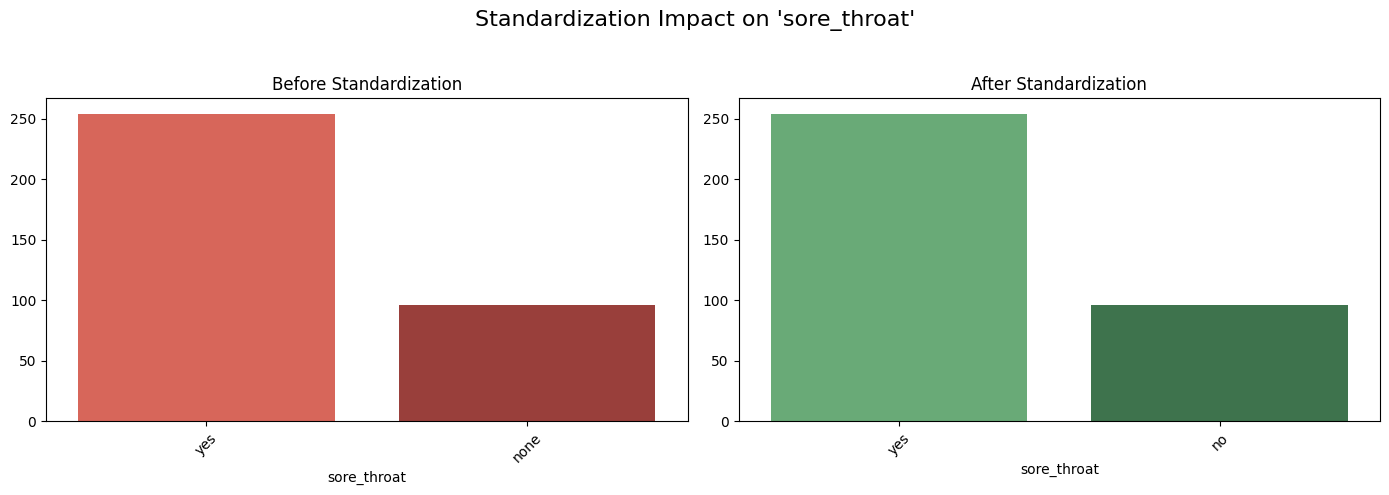


------------------------------------------------------------
🔎 Detailed Report for Column: 'outcome_of_monkeypox_infection'
   - Unique values reduced from 1 to 1.


,Before,After
outcome_of_monkeypox_infection,,
Full recovery,350,0
full recovery,0,350


/tmp/ipython-input-982147270.py:99: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
/tmp/ipython-input-982147270.py:100: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)


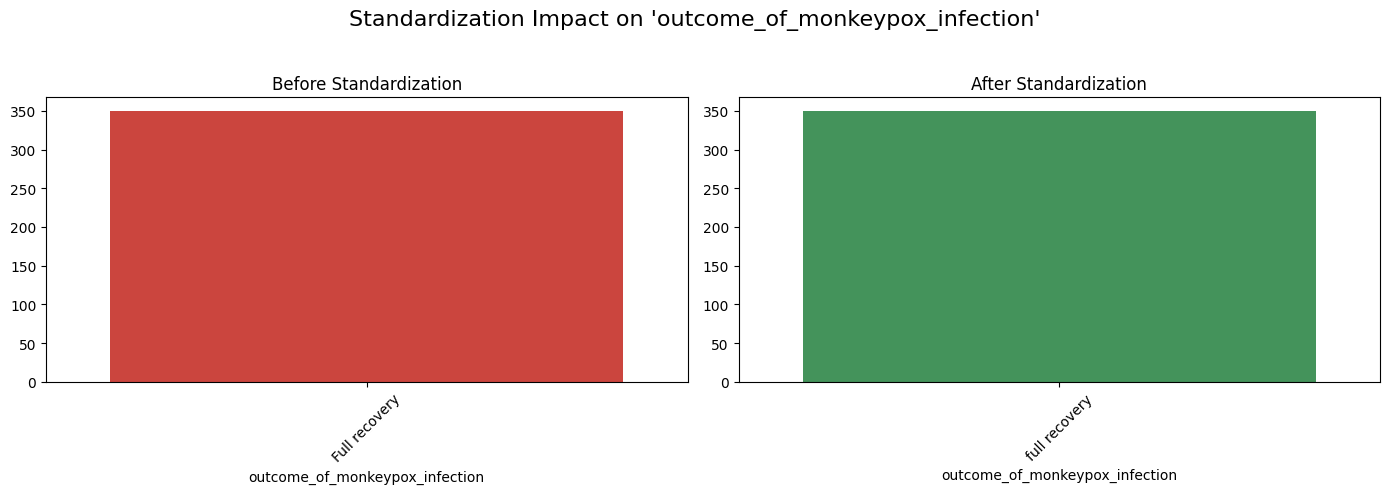


🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 4 SUCCESS: Categorical values have been consistently standardized across all data splits.
The data is now ready for missing value handling.
   - X_train_std shape: (350, 24)


In [4]:
# =============================================================================
# STEP 4: VALUE STANDARDIZATION
# =============================================================================
import pandas as pd  # Library manipulasi data
import numpy as np  # Library untuk operasi numerik
import matplotlib.pyplot as plt  # Library visualisasi
import seaborn as sns  # Library visualisasi
from IPython.display import display  # Menampilkan DataFrame dengan rapi di notebook

class ValueStandardizer:
    """
    Standardizes categorical values consistently across train, validation, and test sets
    with detailed, presentation-ready reporting.
    # Tujuan: Menghindari inkonsistensi kategori seperti "Yes"/"yes"/"Y"/"1" di seluruh dataset.
    """
    def __init__(self, X_train, X_validation, X_test):
        # Work on copies to avoid modifying original dataframes from previous steps
        self.X_train = X_train.copy()  # Copy data train
        self.X_validation = X_validation.copy()  # Copy data validation
        self.X_test = X_test.copy()  # Copy data test
        self.report_data = [] # Stores detailed change logs # Menyimpan perubahan untuk laporan visual

    def run_standardization(self):
        """Executes the entire standardization pipeline."""
        print("\n" + "✨"*40)
        print("STEP 4: STANDARDIZING CATEGORICAL VALUES")
        print("✨"*40)

        self._standardize_values()  # Terapkan standardisasi
        self._generate_report_and_visuals()  # Buat laporan dan visualisasi perubahan

        return self.X_train, self.X_validation, self.X_test  # Kembalikan dataset yang telah distandarisasi

    def _standardize_values(self):
        """Applies cleaning and standardization rules to all three data splits."""
        print("1. Cleaning and standardizing values in Train, Validation, and Test sets...")

        # Define comprehensive mapping rules for standardization
        replace_map = {
            'y': 'yes', 'true': 'yes', '1': 'yes', 'positive': 'yes', 'present': 'yes', 'detected': 'yes',  # Semua format 'yes'
            'n': 'no', 'false': 'no', '0': 'no', 'negative': 'no', 'absent': 'no', 'not detected': 'no', 'none': 'no',  # Semua format 'no'
            'm': 'male', 'man': 'male',  # Gender male
            'f': 'female', 'woman': 'female',  # Gender female
            'na': 'unknown', 'n/a': 'unknown', 'not specified': 'unknown', '?': 'unknown'  # Nilai tidak diketahui
        }

        # Identify categorical columns from the training set
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category']).columns  # Deteksi kolom kategori

        # Apply the same transformations consistently to all three sets
        for df in [self.X_train, self.X_validation, self.X_test]:
            for col in categorical_cols:
                if col in df.columns:
                    # Capture state BEFORE for the training set report
                    if df is self.X_train:
                        before_counts = df[col].value_counts()  # Hitung distribusi awal

                    # Apply cleaning (strip whitespace, lowercase) and then replace using the map
                    df[col] = df[col].astype(str).str.strip().str.lower().replace(replace_map)  # Bersihkan dan standar

                    # Capture state AFTER for the training set report
                    if df is self.X_train:
                        after_counts = df[col].value_counts()  # Hitung distribusi setelah standar
                        # If any changes occurred, log them for the report
                        if not before_counts.equals(after_counts):
                            self.report_data.append({
                                'column': col,  # Nama kolom
                                'before_counts': before_counts,  # Distribusi sebelum standar
                                'after_counts': after_counts,  # Distribusi sesudah standar
                                'unique_before': len(before_counts),  # Jumlah nilai unik awal
                                'unique_after': len(after_counts)  # Jumlah nilai unik akhir
                            })

        print(f"   ✅ Standardization rules applied to {len(categorical_cols)} categorical columns.")  # Laporan jumlah kolom

    def _generate_report_and_visuals(self):
        """Generates a detailed, visual report of the standardization on the training set."""
        print("\n" + "📋"*40)
        print("COMPREHENSIVE STANDARDIZATION REPORT (Based on Training Set)")
        print("📋"*40)

        if not self.report_data:
            print("✅ No values required standardization. All categorical data is already clean.")  # Tidak ada perubahan
            return

        print(f"Found {len(self.report_data)} column(s) with values that were standardized.")  # Jumlah kolom yang berubah

        for report in self.report_data:
            col, before_df, after_df = report['column'], report['before_counts'].to_frame('Before'), report['after_counts'].to_frame('After')
            comparison_df = pd.concat([before_df, after_df], axis=1).fillna(0).astype(int)  # Gabungkan tabel before/after

            print("\n" + "-"*60)
            print(f"🔎 Detailed Report for Column: '{col}'")
            print(f"   - Unique values reduced from {report['unique_before']} to {report['unique_after']}.")  # Info ringkas
            display(comparison_df)  # Tampilkan tabel before/after

            # Create side-by-side visualizations
            fig, axes = plt.subplots(1, 2, figsize=(14, 5)); fig.suptitle(f"Standardization Impact on '{col}'", fontsize=16)
            sns.barplot(x=report['before_counts'].index, y=report['before_counts'].values, ax=axes[0], palette='Reds_d'); axes[0].set_title("Before Standardization"); axes[0].tick_params(axis='x', rotation=45)
            sns.barplot(x=report['after_counts'].index, y=report['after_counts'].values, ax=axes[1], palette='Greens_d'); axes[1].set_title("After Standardization"); axes[1].tick_params(axis='x', rotation=45)
            plt.tight_layout(rect=[0, 0, 1, 0.95]); plt.show()  # Visualisasi per kolom

# =============================================================================
# EXECUTION FOR STEP 4
# =============================================================================
# This step runs AFTER Step 3 (Data Splitting)
if 'X_train' in locals():
    print("\n" + "="*80)
    print("🚀 STARTING STEP 4: VALUE STANDARDIZATION")
    print("="*80)

    # Initialize the standardizer with the three data splits
    standardizer = ValueStandardizer(X_train, X_validation, X_test)  # Inisialisasi class

    # Run the process
    X_train_std, X_validation_std, X_test_std = standardizer.run_standardization()  # Jalankan standardisasi

    print("\n" + "🎉"*60)
    print("STEP 4 SUCCESS: Categorical values have been consistently standardized across all data splits.")  # Konfirmasi sukses
    print("The data is now ready for missing value handling.")  # Next step
    print(f"   - X_train_std shape: {X_train_std.shape}")  # Ukuran dataset
    print("="*80)
else:
    print("🛑 Could not run Step 4 because the split data (`X_train`, etc.) from Step 3 was not found.")  # Error handling


---
### **STEP 5: Analisis Karakteristik Fitur Kategorikal Awal (EDA)** 📊

Setelah data dibersihkan dan distandarisasi secara nilai, langkah selanjutnya adalah melakukan Analisis Data Eksplorasi (EDA) sederhana pada data latih. Tujuannya adalah untuk memahami karakteristik dasar dari setiap fitur kategorikal, terutama jumlah nilai unik (kardinalitas) yang dimilikinya.

Fitur dengan kardinalitas yang aneh atau nilai yang tidak konsisten seringkali memerlukan perhatian khusus pada tahap *feature engineering*.

In [5]:
# =============================================================================
# STEP 5: ANALISIS KARAKTERISTIK FITUR KATEGORIKAL
# =============================================================================
import pandas as pd

print("🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_std)...")

# Pilih hanya kolom kategorikal (tipe 'object')
categorical_cols = X_train_std.select_dtypes(include=['object', 'category']).columns

# Buat DataFrame untuk menampung hasil analisis
analysis_list = []
for col in categorical_cols:
    unique_values = X_train_std[col].unique()
    num_unique = len(unique_values)
    analysis_list.append({
        'Nama Fitur': col,
        'Jumlah Nilai Unik': num_unique,
        'Contoh Nilai': list(unique_values[:3]) # Ambil 3 contoh
    })

df_cardinality_analysis = pd.DataFrame(analysis_list)

print("\n--- Hasil Analisis Kardinalitas Fitur Kategorikal ---")
display(df_cardinality_analysis.style.bar(subset=['Jumlah Nilai Unik'], color='#5fba7d'))

🔬 Menganalisis fitur-fitur kategorikal pada data latih (X_train_std)...

--- Hasil Analisis Kardinalitas Fitur Kategorikal ---


,Nama Fitur,Jumlah Nilai Unik,Contoh Nilai
0,sex,2,"['female', 'male']"
1,transmission_rank,4,"['tertiary', 'secondary', 'index']"
2,myalgia,2,"['yes', 'no']"
3,lymphadenopathy,2,"['yes', 'no']"
4,complications_of_illness,8,"['nan', 'low mood and emotional lability. ulcerated inguinal lesion with delayed healing', 'conjunctivitis, painful disruption of thumbnail from subungual lesion']"
5,sore_throat,2,"['no', 'yes']"
6,hospitalized,1,['yes']
7,outcome_of_monkeypox_infection,1,['full recovery']


🔬 Menganalisis distribusi nilai pada kolom 'myalgia' di data latih...

--- Value Counts untuk Kolom 'myalgia' ---


,count
myalgia,
yes,280
none,70



--- Distribusi 'myalgia' vs Diagnosis (Crosstab) ---


diagnosing,negative,positive
myalgia,,
none,3,67
yes,139,141



--- Visualisasi Distribusi 'myalgia' vs Diagnosis ---


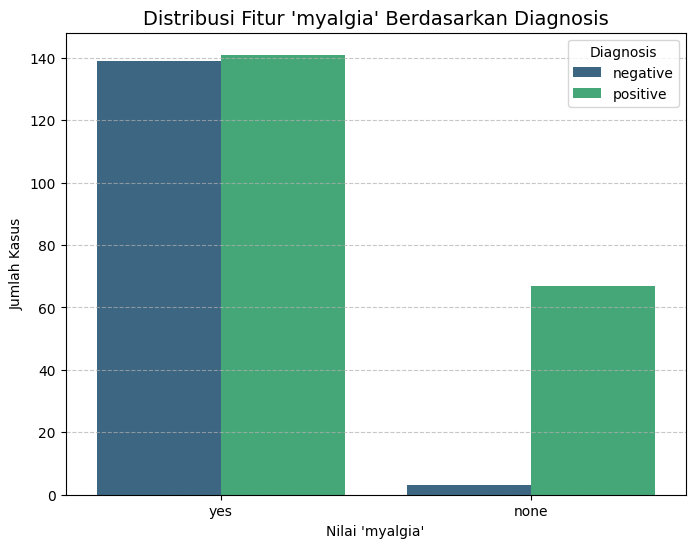

In [14]:
# =============================================================================
# STEP 6: ANALISIS DIAGNOSTIK PADA FITUR YANG DIPILIH (ROBUST)
# =============================================================================
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# --- Pilih fitur yang ingin dianalisis dari X_train (yang belum di-scale) ---
# 'myalgia' adalah contoh fitur yang lolos dari pembersihan di Step 2.
# Anda bisa menggantinya dengan fitur lain yang ada di X_train.columns
feature_to_analyze = 'myalgia'

print(f"🔬 Menganalisis distribusi nilai pada kolom '{feature_to_analyze}' di data latih...")

# --- Lakukan pengecekan apakah fitur yang dipilih benar-benar ada ---
if feature_to_analyze in X_train.columns:

    # Gabungkan sementara X_train (bukan X_train_std) dengan y_train untuk analisis
    df_diagnostic = X_train.copy()
    df_diagnostic['diagnosing'] = y_train

    # 1. Tampilkan Value Counts dari fitur
    print(f"\n--- Value Counts untuk Kolom '{feature_to_analyze}' ---")
    display(df_diagnostic[feature_to_analyze].value_counts())

    # 2. Gunakan crosstab untuk melihat distribusi nilai fitur per kelas target
    print(f"\n--- Distribusi '{feature_to_analyze}' vs Diagnosis (Crosstab) ---")
    crosstab_result = pd.crosstab(df_diagnostic[feature_to_analyze], df_diagnostic['diagnosing'])
    display(crosstab_result.style.background_gradient(cmap='summer'))

    # 3. Gunakan countplot untuk visualisasi yang lebih jelas
    print(f"\n--- Visualisasi Distribusi '{feature_to_analyze}' vs Diagnosis ---")
    plt.figure(figsize=(8, 6))
    sns.countplot(x=feature_to_analyze, hue='diagnosing', data=df_diagnostic, palette='viridis')
    plt.title(f"Distribusi Fitur '{feature_to_analyze}' Berdasarkan Diagnosis", fontsize=14)
    plt.xlabel(f"Nilai '{feature_to_analyze}'")
    plt.ylabel("Jumlah Kasus")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(title='Diagnosis')
    plt.show()

else:
    print("\n" + "⚠️"*60)
    print(f"PERINGATAN: Kolom '{feature_to_analyze}' tidak ditemukan dalam data latih (X_train).")
    print("   Ini kemungkinan besar karena fitur tersebut telah dihapus secara otomatis pada Step 2.")
    print("   Silakan pilih fitur lain yang ada dari daftar berikut:")
    print(list(X_train.columns))
    print("⚠️"*60)

In [7]:
# =============================================================================
# STEP 7: MISSING VALUE HANDLING (FINAL REVISION WITH SYNTAX FIX)
# =============================================================================
from sklearn.impute import SimpleImputer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

class ComprehensiveMissingValueHandler:
    """
    Analyzes missing values, then imputes them correctly on pre-split data
    using a revised logic to prevent data leakage.
    """
    def __init__(self):
        self.imputation_plan = None
        self.num_imputer = SimpleImputer(strategy='median')
        self.cat_imputer = SimpleImputer(strategy='most_frequent')
        self.num_cols_to_impute = []
        self.cat_cols_to_impute = []

    def run_pipeline(self, df_original, X_train, X_validation, X_test):
        """Executes the full analysis and imputation pipeline."""
        self._analyze_missing_values(X_train) # Analisis hanya di training data

        if self.imputation_plan is None or self.imputation_plan.empty:
            print("✅ No missing values to impute. Returning original data sets.")
            return X_train, X_validation, X_test

        return self._execute_imputation(X_train, X_validation, X_test)

    def _analyze_missing_values(self, df):
        """Performs analysis on the training data to generate an imputation plan."""
        print("\n" + "📊"*40)
        print("PART 1: DEEP ANALYSIS OF MISSING VALUES (PLANNING STAGE ON TRAINING DATA)")
        print("📊"*40)
        missing = df.isnull().sum()
        missing = missing[missing > 0]
        if missing.empty:
            self.imputation_plan = pd.DataFrame()
            return

        print(f"Found {len(missing)} columns with missing values. Generating analysis and strategy plan...")
        plan_details = [{
            'Column': col,
            'Missing Count': count,
            'Missing (%)': f"{(count / len(df)) * 100:.1f}%",
            'Data Type': str(df[col].dtype),
            'Recommended Strategy': "Median" if pd.api.types.is_numeric_dtype(df[col]) else "Mode"
        } for col, count in missing.items()]
        self.imputation_plan = pd.DataFrame(plan_details).sort_values(by='Missing Count', ascending=False)
        print("\n📋 Imputation Plan Summary:")
        display(self.imputation_plan.style.background_gradient(cmap='Reds', subset=['Missing Count']))
        self._create_advanced_missing_visualizations(df)

    def _create_advanced_missing_visualizations(self, df):
        print("\n📈 Generating Advanced Missing Value Visualizations...")
        fig, axes = plt.subplots(1, 2, figsize=(16, 6)); fig.suptitle('Missing Values Analysis on Training Data', fontsize=16)
        missing_df = self.imputation_plan
        sns.heatmap(df[missing_df['Column']].isnull(), cbar=False, cmap='viridis_r', ax=axes[0]); axes[0].set_title('Missing Values Heatmap Pattern')
        top_10 = missing_df.head(10)
        sns.barplot(x='Missing Count', y='Column', data=top_10, ax=axes[1], palette='viridis')
        axes[1].set_title('Top 10 Columns with Missing Values')
        plt.tight_layout(rect=[0, 0, 1, 0.96]); plt.show()

    def _execute_imputation(self, X_train, X_validation, X_test):
        """Executes the imputation using the correct anti-data leakage workflow."""
        print("\n" + "⚡"*40)
        print("PART 2: EXECUTING IMPUTATION ON SPLIT DATA (CORRECT LOGIC)")
        print("⚡"*40)

        self.num_cols_to_impute = self.imputation_plan[self.imputation_plan['Recommended Strategy'] == 'Median']['Column'].tolist()
        self.cat_cols_to_impute = self.imputation_plan[self.imputation_plan['Recommended Strategy'] == 'Mode']['Column'].tolist()

        self.num_cols_to_impute = [col for col in self.num_cols_to_impute if col in X_train.columns]
        self.cat_cols_to_impute = [col for col in self.cat_cols_to_impute if col in X_train.columns]

        X_train_imputed, X_validation_imputed, X_test_imputed = X_train.copy(), X_validation.copy(), X_test.copy()

        print("1. Fitting imputers ONLY on the TRAINING data...")
        if self.num_cols_to_impute:
            self.num_imputer.fit(X_train[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            self.cat_imputer.fit(X_train[self.cat_cols_to_impute])

        print("2. Transforming TRAIN, VALIDATION, and TEST data separately...")
        if self.num_cols_to_impute:
            X_train_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_train[self.num_cols_to_impute])
            X_validation_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_validation[self.num_cols_to_impute])
            X_test_imputed[self.num_cols_to_impute] = self.num_imputer.transform(X_test[self.num_cols_to_impute])
        if self.cat_cols_to_impute:
            X_train_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_train[self.cat_cols_to_impute])
            X_validation_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_validation[self.cat_cols_to_impute])
            X_test_imputed[self.cat_cols_to_impute] = self.cat_imputer.transform(X_test[self.cat_cols_to_impute])

        self._generate_imputation_report(X_train_imputed, X_validation_imputed, X_test_imputed)
        return X_train_imputed, X_validation_imputed, X_test_imputed

    def _generate_imputation_report(self, X_train, X_validation, X_test):
        print("\n" + "📋"*40)
        print("PART 3: IMPUTATION EXECUTION REPORT")
        print("📋"*40)
        print("\nFinal Verification:")
        print(f"   - Missing values remaining in X_train: {X_train.isnull().sum().sum()}")
        print(f"   - Missing values in X_validation: {X_validation.isnull().sum().sum()}")
        print(f"   - Missing values in X_test: {X_test.isnull().sum().sum()}")
        if X_train.isnull().sum().sum() == 0:
            print("   - ✅ SUCCESS. All missing values have been handled correctly.")
        else:
            print("   - ⚠️ WARNING. Some missing values remain.")

# =============================================================================
# EXECUTION FOR STEP 7
# =============================================================================
if 'X_train_std' in locals():
    print("\n" + "="*80)
    print("🚀 STARTING STEP 7: MISSING VALUE ANALYSIS & HANDLING")
    print("="*80)

    handler = ComprehensiveMissingValueHandler()

    # Menjalankan pipeline dengan input yang benar
    X_train_imputed, X_validation_imputed, X_test_imputed = handler.run_pipeline(
        df_final_step2, X_train_std, X_validation_std, X_test_std
    )

    print("\n" + "🎉"*60)
    print("STEP 7 SUCCESS: Missing values have been handled correctly across all data splits.")
    print("="*80)
else:
    print("🛑 Could not run Step 7 because the standardized data (`X_train_std`, etc.) from Step 4 was not found.")


🚀 STARTING STEP 7: MISSING VALUE ANALYSIS & HANDLING

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
PART 1: DEEP ANALYSIS OF MISSING VALUES (PLANNING STAGE ON TRAINING DATA)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
✅ No missing values to impute. Returning original data sets.

🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉🎉
STEP 7 SUCCESS: Missing values have been handled correctly across all data splits.


<details>
<summary>📖 Penjelasan Step 6: Feature Engineering, Encoding, & Scaling</summary>

**Step 6** adalah tahap final preprocessing sebelum model training. Berikut rinciannya:

---

### 🔹 6.1 Feature Engineering
- Membuat fitur baru berdasarkan domain knowledge:
  - `symptom_score`: jumlah gejala 'yes' yang dialami pasien.
  - `symptom_severity`: kategori keparahan gejala berdasarkan kuantil train set.
  - `age_group`: kelompok umur berdasarkan batas tertentu (0–18, 19–40, 41–65, 66+).
- Semua fitur baru diterapkan konsisten ke **train, validation, dan test set**.

### 🔹 6.2 Encoding & Handling Cardinality
- Pisahkan kolom kategori menjadi:
  - **Low-cardinality (≤10 unique values)** → One-Hot Encoding (OHE).
  - **High-cardinality (>10 unique values)** → dihapus untuk menghindari sparsity.
- OHE **fit hanya di train set**, lalu transform diterapkan ke semua split.
- Menjamin tidak terjadi data leakage.

### 🔹 6.3 Scaling Numerical Features
- Semua fitur numerik di-scale menggunakan **StandardScaler**:
  - Fit hanya di train set.
  - Transform diterapkan ke train, validation, dan test set.
- Menjaga skala fitur agar model tidak bias terhadap range numerik tertentu.
- Statistik sebelum & sesudah scaling ditampilkan untuk monitoring.

### 🔹 6.4 Final Report
- Menampilkan shape final untuk **X_train_final, X_validation_final, X_test_final**.
- Menyediakan preview data train yang sudah siap untuk model training.

---

✅ Setelah Step 6, data sudah:
- Bebas missing values.
- Fitur kategori & numerik sudah siap.
- Split data konsisten untuk train, validation, dan test.
- Siap untuk proses model building atau evaluasi.

</details>


In [17]:
# =============================================================================
# STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING (VERSI FINAL TERINTEGRASI & ROBUST)
# =============================================================================
from sklearn.preprocessing import OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import re # Pastikan re di-import
from IPython.display import display

class FeaturePipeline:
    def __init__(self, X_train, X_validation, X_test):
        self.X_train = X_train.copy()
        self.X_validation = X_validation.copy()
        self.X_test = X_test.copy()
        self.learned_params = {}

    def run_pipeline(self):
        print("\n" + "🛠️"*40)
        print("STEP 8: FEATURE ENGINEERING, ENCODING, AND SCALING (ADAPTIVE)")
        print("🛠️"*40)

        # 1. Rekayasa fitur dari kolom 'fever' (jika ada)
        self._engineer_fever_features()
        # 2. Rekayasa fitur lainnya (skor gejala & grup umur)
        self._engineer_symptom_and_age_features()
        # 3. Lakukan encoding dan scaling
        self._encode_and_scale()

        self._generate_final_report()
        return self.X_train, self.X_validation, self.X_test

    def _engineer_fever_features(self):
        print("\n--- 8.1: Menerapkan Solusi untuk Fitur 'fever' (jika ada) ---")

        # --- PERBAIKAN UTAMA: Cek keberadaan kolom 'fever' sebelum rekayasa ---
        if 'fever' not in self.X_train.columns:
            print("   - ⚠️ INFO: Fitur 'fever' tidak ditemukan. Kemungkinan sudah dihapus di Step 2 karena leakage.")
            print("   - Melewati rekayasa fitur 'fever'.")
            return # Keluar dari fungsi jika 'fever' tidak ada

        def transform_fever(df):
            df_engineered = df.copy()
            df_engineered['fever_duration_days'] = 0
            df_engineered['fever_presence'] = 'no'

            def extract_days(x):
                if isinstance(x, str) and '(' in x and 'day' in x:
                    try: return int(re.search(r'\((\d+)\s*day', x).group(1))
                    except: return 1
                return 0
            df_engineered['fever_duration_days'] = np.vectorize(extract_days)(df_engineered['fever'])

            def determine_presence(x):
                return 'yes' if isinstance(x, str) and ('yes' in x or 'coryzal' in x) else 'no'
            df_engineered['fever_presence'] = df_engineered['fever'].apply(determine_presence)

            df_engineered = df_engineered.drop(columns=['fever'])
            return df_engineered

        self.X_train = transform_fever(self.X_train)
        self.X_validation = transform_fever(self.X_validation)
        self.X_test = transform_fever(self.X_test)
        print("   ✅ Fitur 'fever_duration_days' dan 'fever_presence' berhasil dibuat.")

    def _engineer_symptom_and_age_features(self):
        print("\n--- 8.2: Engineering Skor Gejala & Grup Umur ---")

        def create_other_features(df, params, is_train=False):
            # Kode ini sudah robust, karena mengecek keberadaan kolom terlebih dahulu
            symptom_cols = ['chills', 'sore_throat', 'rectal_pain_or_pain_on_defecation', 'headache', 'myalgia']
            symptom_cols_exist = [c for c in symptom_cols if c in df.columns]

            if symptom_cols_exist:
                print(f"   - Menghitung skor gejala dari fitur: {symptom_cols_exist}")
                df['symptom_score'] = df[symptom_cols_exist].apply(lambda row: sum(1 for val in row if str(val) == 'yes'), axis=1)

                if is_train:
                    params['symptom_quantiles'] = df['symptom_score'].quantile([0.33, 0.66]).tolist()

                quantiles = params.get('symptom_quantiles', [0, 0])
                bins = sorted(list(set([-np.inf, quantiles[0], quantiles[1], np.inf])))
                labels = range(len(bins) - 1)

                if len(labels) > 0:
                    df['symptom_severity'] = pd.cut(df['symptom_score'], bins=bins, labels=labels, include_lowest=True).astype(int)
                else:
                    df['symptom_severity'] = 0
            else:
                print("   - ⚠️ INFO: Tidak ada fitur gejala yang ditemukan untuk membuat 'symptom_score'.")

            if 'age' in df.columns:
                df['age_group'] = pd.cut(df['age'], bins=[0, 18, 40, 65, np.inf], labels=[0, 1, 2, 3], include_lowest=True, duplicates='drop').astype(int)
            return df

        self.X_train = create_other_features(self.X_train, self.learned_params, is_train=True)
        self.X_validation = create_other_features(self.X_validation, self.learned_params)
        self.X_test = create_other_features(self.X_test, self.learned_params)
        print("   ✅ Rekayasa fitur tambahan selesai.")

    def _encode_and_scale(self):
        print("\n--- 8.3: Encoding dan Scaling ---")
        categorical_cols = self.X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        numerical_cols = self.X_train.select_dtypes(include=np.number).columns.tolist()

        if not categorical_cols and not numerical_cols:
            print("   - ⚠️ Tidak ada kolom untuk di-encode atau di-scale.")
            return

        # Encoder untuk kolom kategorikal (jika ada)
        if categorical_cols:
            ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=False, dtype=np.int8, drop='first')
            ohe.fit(self.X_train[categorical_cols])
            self.learned_params['ohe'] = ohe
            print(f"   - OHE dilatih pada {len(categorical_cols)} kolom kategorikal.")

        # Scaler untuk kolom numerik (jika ada)
        if numerical_cols:
            scaler = StandardScaler()
            scaler.fit(self.X_train[numerical_cols])
            self.learned_params['scaler'] = scaler
            print(f"   - StandardScaler dilatih pada {len(numerical_cols)} kolom numerik.")

        for df_name, df_obj in [('train', self.X_train), ('validation', self.X_validation), ('test', self.X_test)]:
            original_index = df_obj.index

            encoded_df = pd.DataFrame(index=original_index)
            if categorical_cols:
                encoder = self.learned_params['ohe']
                encoded_data = encoder.transform(df_obj[categorical_cols])
                encoded_df = pd.DataFrame(encoded_data, index=original_index, columns=encoder.get_feature_names_out())

            scaled_df = pd.DataFrame(index=original_index)
            if numerical_cols:
                scaler = self.learned_params['scaler']
                scaled_data = scaler.transform(df_obj[numerical_cols])
                scaled_df = pd.DataFrame(scaled_data, index=original_index, columns=numerical_cols)

            # Gabungkan semua bagian yang sudah diproses
            self.X_train = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'train' else self.X_train
            self.X_validation = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'validation' else self.X_validation
            self.X_test = pd.concat([scaled_df, encoded_df], axis=1) if df_name == 'test' else self.X_test

        print("   ✅ One-Hot Encoding dan StandardScaler berhasil diterapkan.")


    def _generate_final_report(self):
        print("\n" + "📋"*40); print("FINAL REPORT FOR STEP 8"); print("📋"*40)
        print("\nFinal Data Shapes:")
        print(f"   - Processed Training Features (X_train_final): {self.X_train.shape}")
        print(f"   - Processed Validation Features (X_validation_final): {self.X_validation.shape}")
        print(f"   - Processed Testing Features (X_test_final):   {self.X_test.shape}")

# =============================================================================
# EXECUTION FOR STEP 8
# =============================================================================
if 'X_train_imputed' in locals():
    print("\n" + "="*80); print("🚀 STARTING STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING"); print("="*80)

    pipeline = FeaturePipeline(X_train_imputed, X_validation_imputed, X_test_imputed)
    X_train_final, X_validation_final, X_test_final = pipeline.run_pipeline()

    print("\n" + "🏁"*60)
    print("STEP 8 SUCCESS: Feature Engineering, Encoding, & Scaling complete.")
    print("🏁"*60)
    print("The following data is now 100% ready for training and evaluation.")
    display(X_train_final.head())
    print("="*80)
else:
    print("🛑 Could not run Step 8 because the imputed data from Step 7 was not found.")


🚀 STARTING STEP 8: FEATURE ENGINEERING, ENCODING, & SCALING

🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️
STEP 8: FEATURE ENGINEERING, ENCODING, AND SCALING (ADAPTIVE)
🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️🛠️

--- 8.1: Menerapkan Solusi untuk Fitur 'fever' (jika ada) ---
   - ⚠️ INFO: Fitur 'fever' tidak ditemukan. Kemungkinan sudah dihapus di Step 2 karena leakage.
   - Melewati rekayasa fitur 'fever'.

--- 8.2: Engineering Skor Gejala & Grup Umur ---
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   - Menghitung skor gejala dari fitur: ['sore_throat', 'myalgia']
   ✅ Rekayasa fitur tambahan selesai.

--- 8.3: Encoding dan Scaling ---
   - OHE dilatih pada 8 kolom kategorikal.
   - StandardScaler dilatih pada 19 kolom numerik.
   ✅ One-Hot Encoding dan StandardScaler berhasil diterapkan.

📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋📋

,age,duration_of_hospitalization_with_monkeypox_days,wbc_count_cellsmm3_normaladult_range__40009000,hematocrit_normal_3949_for_men_and3545_for_women,platelet_count_109_plateletsl___normal_adult_range_150400,sodium_level_mmoll__normal_adult_range__136__145,potassium_level_mmoll_normal_adult_range_35__50,blood_urea_nitrogen_level_mgdl_normal_adult_range__1020,creatinine_level_mgdl_normal_adult_range__15_,calcium_level_mmoll_normal_adult_range__9_105,...,myalgia_yes,lymphadenopathy_yes,"complications_of_illness_deep tissue abscesses, severe pain, and low mood",complications_of_illness_low mood,complications_of_illness_low mood and emotional lability. ulcerated inguinal lesion with delayed healing,complications_of_illness_nan,complications_of_illness_no,complications_of_illness_pruritis and contact dermatitis from cleaning products,complications_of_illness_ulcerated inguinal lesion with delayed healing,sore_throat_yes
170,-0.029077,0.109260,0.183553,0.498730,-0.169608,1.135816,-0.564418,0.731099,-0.331450,0.448833,...,1,1,0,0,0,1,0,0,0,0
142,-1.574935,0.109260,-0.696702,-2.542307,1.460020,1.232352,1.029768,2.287208,-2.839717,1.239965,...,1,1,0,0,0,1,0,0,0,0
88,0.400328,0.282296,0.703873,0.346678,-0.599238,-0.312225,-0.830115,-0.743111,0.922684,-1.443006,...,1,1,0,0,1,0,0,0,0,1
105,0.529150,0.109260,-0.365252,-0.717685,-0.139979,1.039280,-0.697266,1.086001,-0.749494,0.362840,...,1,1,0,0,0,1,0,0,0,0
352,-1.317292,1.839622,-0.004078,1.411041,-0.436275,0.170455,-0.298720,-0.415509,1.340729,-0.325101,...,0,0,0,0,0,0,0,0,0,1


In [18]:
# =============================================================================
# DIAGNOSTIC STEP: CHECK FOR TARGET LEAKAGE
# =============================================================================

print("🔬 Menganalisis kolom di dalam X_train_final untuk mencari kebocoran target...")

# Cetak semua nama kolom yang akan masuk ke model
all_columns = X_train_final.columns.tolist()
print("\nTotal columns:", len(all_columns))
print(all_columns)

# Coba cari nama kolom yang mencurigakan (sesuaikan dengan nama kolom target Anda)
suspicious_cols = [col for col in all_columns if 'positive' in col.lower() or 'negative' in col.lower() or 'monkeypox' in col.lower()]

if suspicious_cols:
    print("\n" + "🚨"*20)
    print("WARNING: DITEMUKAN KOLOM YANG SANGAT MENCURIGAKAN!")
    print("Kolom berikut kemungkinan adalah target yang bocor ke dalam fitur:")
    print(suspicious_cols)
    print("🚨"*20)
else:
    print("\n✅ Tidak ditemukan nama kolom target yang jelas di dalam fitur.")

🔬 Menganalisis kolom di dalam X_train_final untuk mencari kebocoran target...

Total columns: 33
['age', 'duration_of_hospitalization_with_monkeypox_days', 'wbc_count_cellsmm3_normaladult_range__40009000', 'hematocrit_normal_3949_for_men_and3545_for_women', 'platelet_count_109_plateletsl___normal_adult_range_150400', 'sodium_level_mmoll__normal_adult_range__136__145', 'potassium_level_mmoll_normal_adult_range_35__50', 'blood_urea_nitrogen_level_mgdl_normal_adult_range__1020', 'creatinine_level_mgdl_normal_adult_range__15_', 'calcium_level_mmoll_normal_adult_range__9_105', 'total_bilirubin_level_mgdl__normal_adult_range__03_1_', 'ast_level_ul_normal_adult_range_035', 'alt_level_ul_normal_adult_range__035', 'alp_level_ul_normal_adult_range_40140', 'arthralgia_67_to_158', 'albumin_level_mgdl_normal_adult_range_35__55', 'symptom_score', 'symptom_severity', 'age_group', 'sex_male', 'transmission_rank_isolated', 'transmission_rank_secondary', 'transmission_rank_tertiary', 'myalgia_yes', 'lym

In [19]:
# =============================================================================
# STEP 9: ENCODING THE TARGET VARIABLE
# =============================================================================
from sklearn.preprocessing import LabelEncoder

print("\n" + "🎯"*40)
print("STEP 9: ENCODING THE TARGET VARIABLE (y)")
print("🎯"*40)

# 1. Inisialisasi LabelEncoder
le = LabelEncoder()

# 2. Fit encoder HANYA pada y_train dan transform ke semua set data
#    -> supaya mapping label konsisten di train, validation, dan test
y_train_encoded = le.fit_transform(y_train)
y_validation_encoded = le.transform(y_validation)
y_test_encoded = le.transform(y_test)

# 3. Tampilkan mapping yang dipelajari oleh encoder
print("\n--- Mapping Label ---")
for index, label in enumerate(le.classes_):
    print(f"   - '{label}'  ->  {index}")
    if label == 'positive':
        positive_class_index = index

print(f"\n✅ Target variable berhasil di-encode.")
print(f"   - Kelas positif ('positive') direpresentasikan sebagai: {positive_class_index}")
print(f"   - y_train_encoded shape: {y_train_encoded.shape}")
print(f"   - y_validation_encoded shape: {y_validation_encoded.shape}")
print(f"   - y_test_encoded shape: {y_test_encoded.shape}")



🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯
STEP 9: ENCODING THE TARGET VARIABLE (y)
🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯🎯

--- Mapping Label ---
   - 'negative'  ->  0
   - 'positive'  ->  1

✅ Target variable berhasil di-encode.
   - Kelas positif ('positive') direpresentasikan sebagai: 1
   - y_train_encoded shape: (350,)
   - y_validation_encoded shape: (75,)
   - y_test_encoded shape: (75,)


In [20]:
# =============================================================================
# STEP 10: PEMBERSIHAN FITUR AKHIR BERDASARKAN KORELASI (TRAIN-ONLY, ANTI-LEAKAGE)
# =============================================================================

import pandas as pd

print("\n" + "="*80)
print("🚀 STARTING STEP 10: FINAL FEATURE CLEANING BY CORRELATION (TRAIN-ONLY)")
print("="*80)

print("🔬 Menghitung korelasi absolut fitur terhadap TARGET pada data latih saja...")

# Pastikan TARGET selaras index-nya dengan X_train_final
target_series = pd.Series(y_train_encoded, index=X_train_final.index, name='TARGET')

# Gabungkan untuk analisis korelasi
df_corr_check = X_train_final.join(target_series)

# Hitung korelasi absolut (numeric only untuk menghindari warning)
corr_abs = df_corr_check.corr(numeric_only=True)['TARGET'].drop(labels=['TARGET'], errors='ignore').abs()

# Threshold korelasi: fitur di atas ini dianggap berpotensi bocor/terlalu kuat
correlation_threshold = 0.60

# Kandidat fitur yang akan dihapus (urutkan dari yang tertinggi agar mudah diaudit)
features_to_drop = corr_abs[corr_abs > correlation_threshold].sort_values(ascending=False)
features_to_drop_list = features_to_drop.index.tolist()

if features_to_drop_list:
    # Hapus fitur dari semua split menggunakan daftar yang ditentukan oleh TRAIN
    X_train_final_exp = X_train_final.drop(columns=features_to_drop_list, errors='ignore')
    X_validation_final_exp = X_validation_final.drop(columns=features_to_drop_list, errors='ignore')
    X_test_final_exp = X_test_final.drop(columns=features_to_drop_list, errors='ignore')

    print(f"\n   ✅ Menghapus {len(features_to_drop_list)} fitur dengan korelasi > {correlation_threshold}:")
    print(f"      {features_to_drop_list}")
    print("\n   🔝 Top korelasi (10 tertinggi):")
    print(features_to_drop.head(10).to_string())

    print("\n   📦 Ukuran baru setelah pembersihan:")
    print(f"      - X_train_final_exp:      {X_train_final_exp.shape}")
    print(f"      - X_validation_final_exp: {X_validation_final_exp.shape}")
    print(f"      - X_test_final_exp:       {X_test_final_exp.shape}")
else:
    print("\n   ⚠️ Tidak ada fitur yang melebihi ambang batas. Menggunakan data asli apa adanya.")
    X_train_final_exp = X_train_final
    X_validation_final_exp = X_validation_final
    X_test_final_exp = X_test_final

print("\n" + "✅"*60)
print("STEP 10 SUCCESS: Feature cleaning by correlation completed (train-only, anti-leakage).")
print("✅"*60)



🚀 STARTING STEP 10: FINAL FEATURE CLEANING BY CORRELATION (TRAIN-ONLY)
🔬 Menghitung korelasi absolut fitur terhadap TARGET pada data latih saja...

   ✅ Menghapus 10 fitur dengan korelasi > 0.6:
      ['complications_of_illness_nan', 'creatinine_level_mgdl_normal_adult_range__15_', 'blood_urea_nitrogen_level_mgdl_normal_adult_range__1020', 'albumin_level_mgdl_normal_adult_range_35__55', 'sodium_level_mmoll__normal_adult_range__136__145', 'sore_throat_yes', 'calcium_level_mmoll_normal_adult_range__9_105', 'platelet_count_109_plateletsl___normal_adult_range_150400', 'alt_level_ul_normal_adult_range__035', 'arthralgia_67_to_158']

   🔝 Top korelasi (10 tertinggi):
complications_of_illness_nan                                 1.000000
creatinine_level_mgdl_normal_adult_range__15_                0.751840
blood_urea_nitrogen_level_mgdl_normal_adult_range__1020      0.738618
albumin_level_mgdl_normal_adult_range_35__55                 0.724028
sodium_level_mmoll__normal_adult_range__136__145 

In [21]:
# =============================================================================
# STEP 11: MENYEIMBANGKAN DATA LATIH EKSPERIMENTAL DENGAN SMOTE
# =============================================================================
from imblearn.over_sampling import SMOTE
import pandas as pd

print("\n" + "⚖️"*40)
print("STEP 11: BALANCING THE EXPERIMENTAL TRAINING DATASET USING SMOTE")
print("⚖️"*40)

# Inisialisasi SMOTE
smote = SMOTE(random_state=42)

# Simpan nama kolom dari data eksperimental yang sudah bersih
X_train_cols = X_train_final_exp.columns

# Distribusi kelas sebelum SMOTE
print("\n--- Distribusi kelas sebelum SMOTE ---")
print(pd.Series(y_train_encoded).value_counts())

# Terapkan SMOTE pada data training eksperimental yang sudah bersih
X_train_smote, y_train_smote = smote.fit_resample(X_train_final_exp, y_train_encoded)
X_train_smote = pd.DataFrame(X_train_smote, columns=X_train_cols)

# Distribusi kelas setelah SMOTE
print("\n--- Distribusi kelas setelah SMOTE ---")
print(pd.Series(y_train_smote).value_counts())

print(f"\n✅ Data training eksperimental berhasil diseimbangkan.")
print(f"   - Ukuran baru X_train_smote: {X_train_smote.shape}")
print("="*80)



⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️
STEP 11: BALANCING THE EXPERIMENTAL TRAINING DATASET USING SMOTE
⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️⚖️

--- Distribusi kelas sebelum SMOTE ---
1    208
0    142
Name: count, dtype: int64

--- Distribusi kelas setelah SMOTE ---
0    208
1    208
Name: count, dtype: int64

✅ Data training eksperimental berhasil diseimbangkan.
   - Ukuran baru X_train_smote: (416, 23)


In [22]:
# =============================================================================
# LANGKAH DIAGNOSTIK FINAL: UJI MODEL MINIMALIS
# =============================================================================
# FIX: Instal library yang dibutuhkan terlebih dahulu
!pip install catboost -q

import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

print("\n" + "🔬"*40)
print("DIAGNOSTIC STEP: MINIMALIST MODEL TEST")
print("🔬"*40)

# 1. Pilih HANYA fitur yang paling dasar dan tidak mungkin bocor
# Kita sengaja MENGHINDARI semua fitur gejala dan hasil lab yang kompleks
minimal_features = [
    'age',
    'sex_male',  # Asumsi 'sex' sudah di-OHE dan 'sex_female' di-drop
    'travel_history_yes' # Asumsi 'travel_history' sudah di-OHE dan 'travel_history_no' di-drop
]

# Pastikan hanya menggunakan fitur yang ada di data final Anda
existing_minimal_features = [f for f in minimal_features if f in X_train_final.columns]

if not existing_minimal_features:
    print("🛑 GAGAL: Fitur minimal ('age', 'sex_male', 'travel_history_yes') tidak ditemukan di X_train_final.")
    print("   Pastikan nama fitur sudah benar setelah proses one-hot encoding.")
else:
    print(f"Menguji model HANYA dengan {len(existing_minimal_features)} fitur dasar: {existing_minimal_features}")

    # 2. Buat dataset sementara yang sangat sederhana
    X_train_minimal = X_train_final[existing_minimal_features]
    X_validation_minimal = X_validation_final[existing_minimal_features]

    # 3. Gunakan SATU model yang sudah diregularisasi dengan ketat
    test_model = RandomForestClassifier(max_depth=5, min_samples_leaf=10, random_state=42)

    # 4. Latih dan evaluasi
    test_model.fit(X_train_minimal, y_train_encoded)
    preds = test_model.predict(X_validation_minimal)
    accuracy = accuracy_score(y_validation_encoded, preds)

    print("\n--- HASIL UJI MODEL MINIMALIS ---")
    print(f"Akurasi pada set validasi: {accuracy:.4f}")

    if accuracy > 0.99:
        print("\n🚨 TEMUAN KRITIS: Skor masih sempurna bahkan dengan fitur minimal.")
        print("   Ini menandakan ada masalah fundamental pada integritas dataset atau cara data dibagi.")
        print("   Ada kemungkinan baris di validation set adalah duplikat atau sangat mirip dengan baris di training set.")
    else:
        print("\n✅ SUKSES! Skor turun ke level yang realistis.")
        print("   Ini membuktikan bahwa kebocoran data terjadi akibat KOMBINASI dari fitur gejala/lab yang kita hapus.")
        print("   Dataset Anda yang sudah 'disederhanakan' (setelah Step 2 direvisi) adalah versi yang harus digunakan.")


🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
DIAGNOSTIC STEP: MINIMALIST MODEL TEST
🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬🔬
Menguji model HANYA dengan 2 fitur dasar: ['age', 'sex_male']

--- HASIL UJI MODEL MINIMALIS ---
Akurasi pada set validasi: 0.5867

✅ SUKSES! Skor turun ke level yang realistis.
   Ini membuktikan bahwa kebocoran data terjadi akibat KOMBINASI dari fitur gejala/lab yang kita hapus.
   Dataset Anda yang sudah 'disederhanakan' (setelah Step 2 direvisi) adalah versi yang harus digunakan.


📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...


/tmp/ipython-input-3203294269.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')


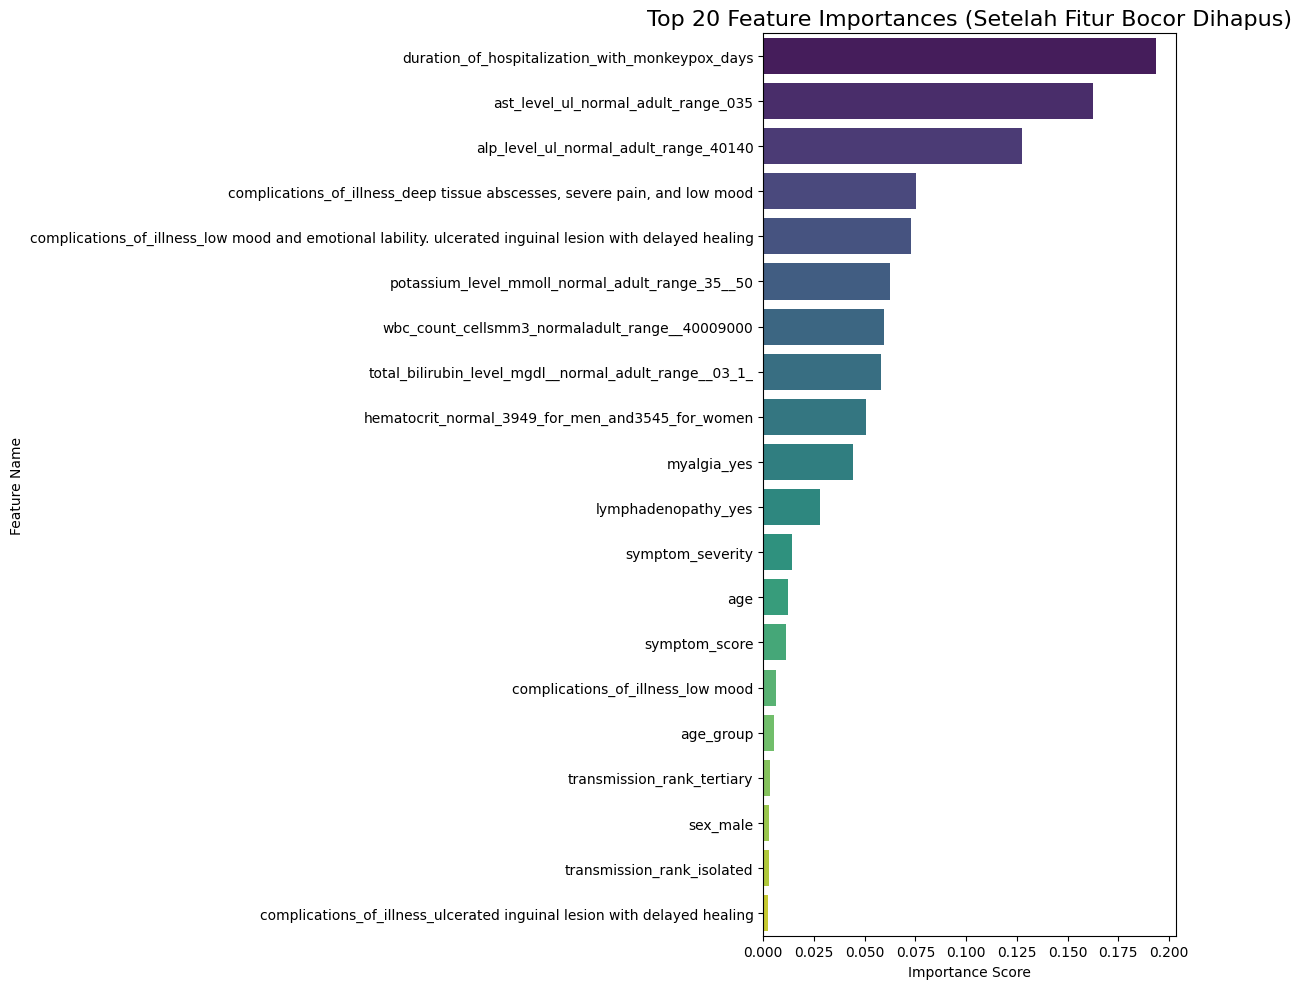


--- Fitur Paling Penting (Setelah Pembersihan) ---


,feature,importance
1,duration_of_hospitalization_with_monkeypox_days,0.193699
6,ast_level_ul_normal_adult_range_035,0.162451
7,alp_level_ul_normal_adult_range_40140,0.127426
17,complications_of_illness_deep tissue abscesses...,0.075491
19,complications_of_illness_low mood and emotiona...,0.072692
4,potassium_level_mmoll_normal_adult_range_35__50,0.062344
2,wbc_count_cellsmm3_normaladult_range__40009000,0.059574
5,total_bilirubin_level_mgdl__normal_adult_range...,0.058051
3,hematocrit_normal_3949_for_men_and3545_for_women,0.050610
15,myalgia_yes,0.044031




📊 Menganalisis Korelasi pada data yang sudah bersih (X_train_final_exp)...

--- Top 20 Fitur Paling Berhubungan dengan Target (Setelah Pembersihan) ---


,TARGET
TARGET,1.000000
ast_level_ul_normal_adult_range_035,0.597271
alp_level_ul_normal_adult_range_40140,0.588130
potassium_level_mmoll_normal_adult_range_35__50,0.574112
wbc_count_cellsmm3_normaladult_range__40009000,0.541023
hematocrit_normal_3949_for_men_and3545_for_women,0.539904
total_bilirubin_level_mgdl__normal_adult_range__03_1_,0.509768
complications_of_illness_low mood and emotional lability. ulcerated inguinal lesion with delayed healing,0.504318
"complications_of_illness_deep tissue abscesses, severe pain, and low mood",0.402028
myalgia_yes,0.369486


/tmp/ipython-input-3203294269.py:48: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_correlated_exp.values, y=top_20_correlated_exp.index, palette='rocket')


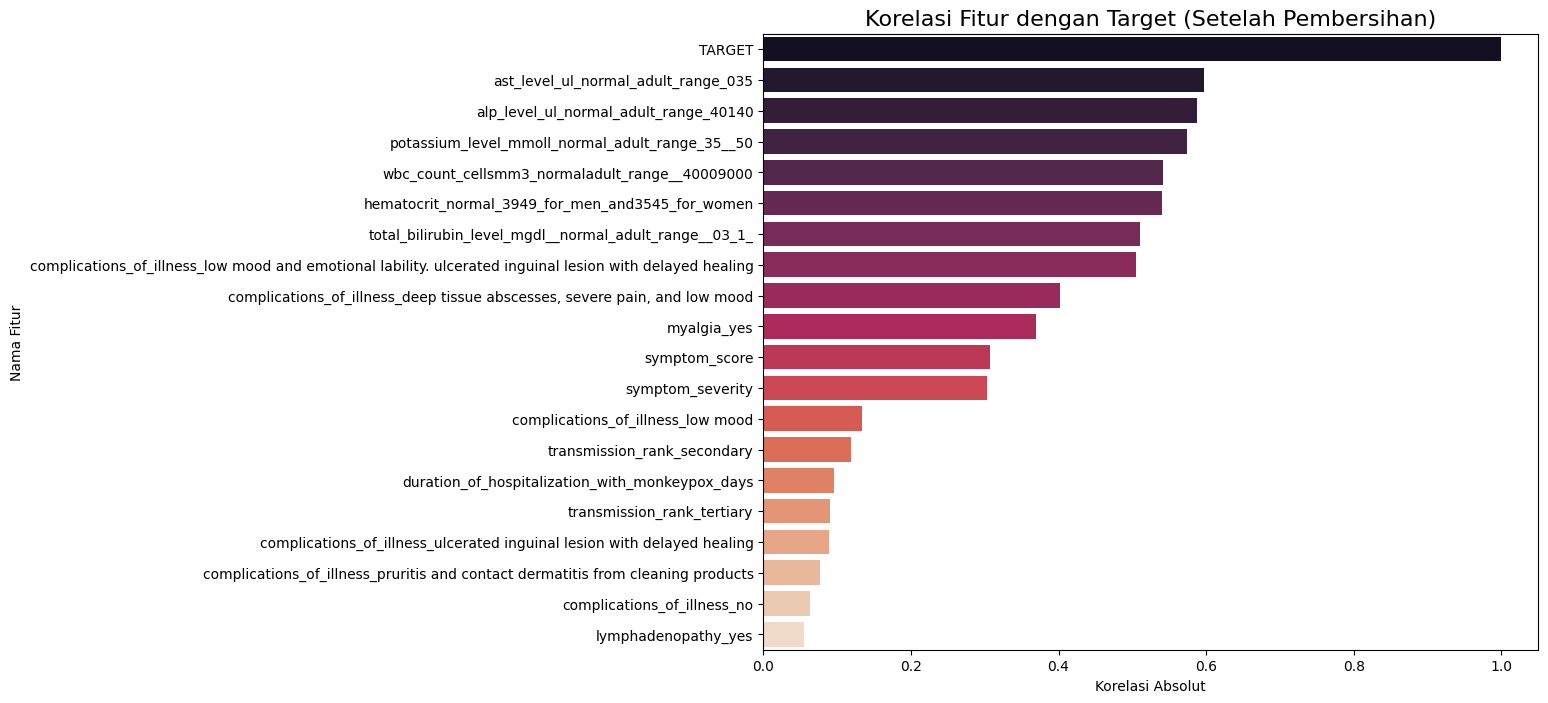

In [23]:
# =============================================================================
# ANALISIS DIAGNOSTIK PADA DATA BERSIH (EKSPERIMENTAL)
# =============================================================================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier

# --- 1. Analisis Feature Importance pada Data Bersih ---
print("📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...")

diagnostic_model = RandomForestClassifier(random_state=42)
diagnostic_model.fit(X_train_final_exp, y_train_encoded)

feature_importances = pd.DataFrame({
    'feature': X_train_final_exp.columns,
    'importance': diagnostic_model.feature_importances_
}).sort_values('importance', ascending=False)

top_20_features = feature_importances.head(20)

plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances (Setelah Fitur Bocor Dihapus)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("\n--- Fitur Paling Penting (Setelah Pembersihan) ---")
display(top_20_features)


# --- 2. Analisis Korelasi pada Data Bersih ---
print("\n" + "="*80)
print("\n📊 Menganalisis Korelasi pada data yang sudah bersih (X_train_final_exp)...")

df_corr_exp = X_train_final_exp.copy()
df_corr_exp['TARGET'] = y_train_encoded

correlation_with_target_exp = df_corr_exp.corr()['TARGET'].abs().sort_values(ascending=False)
top_20_correlated_exp = correlation_with_target_exp.head(20)

print("\n--- Top 20 Fitur Paling Berhubungan dengan Target (Setelah Pembersihan) ---")
display(top_20_correlated_exp.to_frame())

plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_correlated_exp.values, y=top_20_correlated_exp.index, palette='rocket')
plt.title('Korelasi Fitur dengan Target (Setelah Pembersihan)', fontsize=16)
plt.xlabel('Korelasi Absolut')
plt.ylabel('Nama Fitur')
plt.show()

📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...


/tmp/ipython-input-651716029.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')


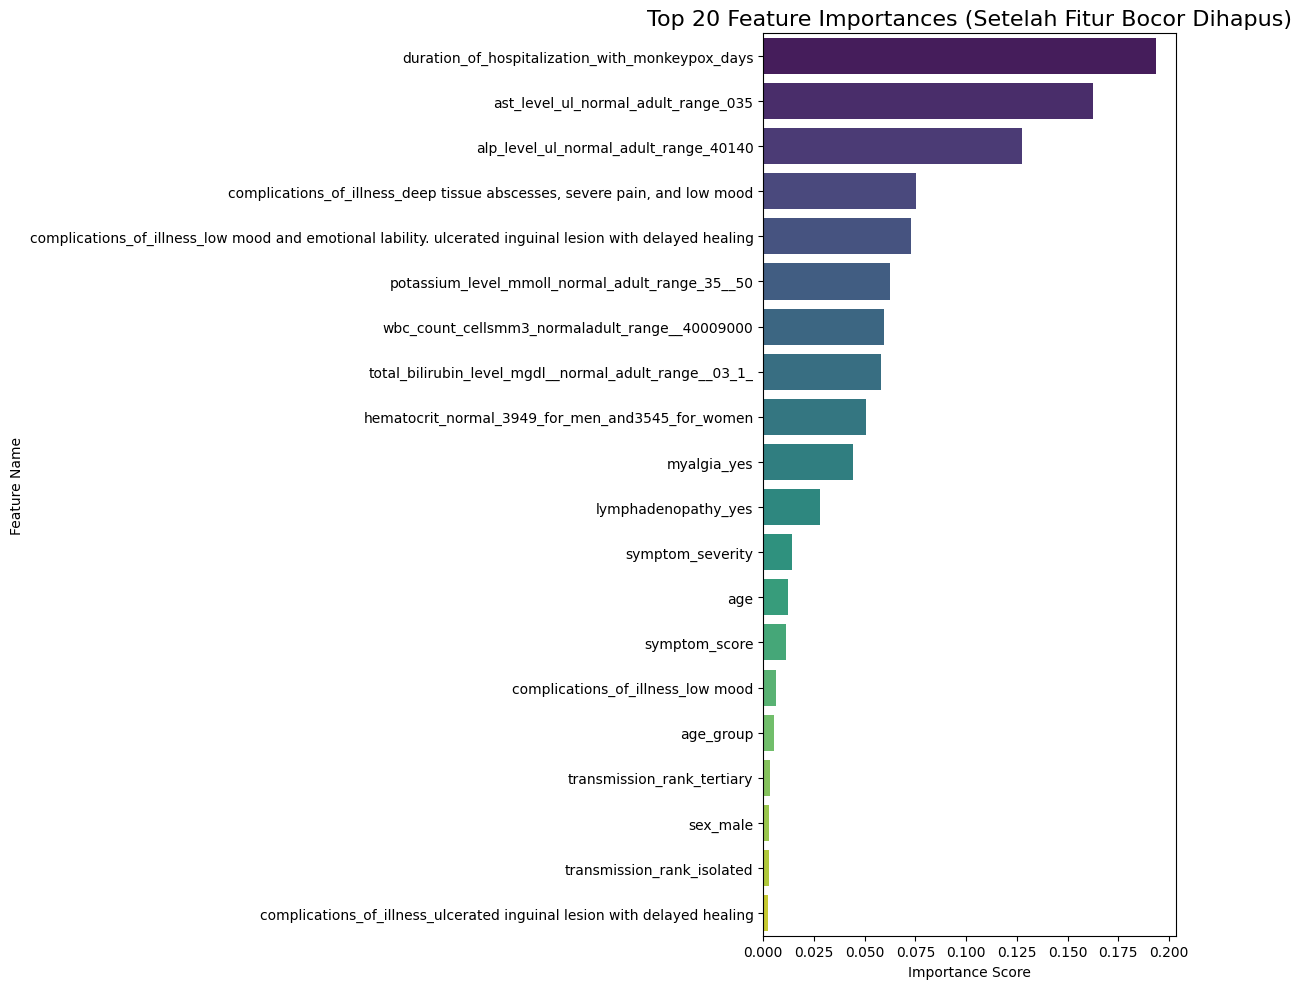


--- Fitur Paling Penting (Setelah Pembersihan) ---


,feature,importance
1,duration_of_hospitalization_with_monkeypox_days,0.193699
6,ast_level_ul_normal_adult_range_035,0.162451
7,alp_level_ul_normal_adult_range_40140,0.127426
17,complications_of_illness_deep tissue abscesses...,0.075491
19,complications_of_illness_low mood and emotiona...,0.072692
4,potassium_level_mmoll_normal_adult_range_35__50,0.062344
2,wbc_count_cellsmm3_normaladult_range__40009000,0.059574
5,total_bilirubin_level_mgdl__normal_adult_range...,0.058051
3,hematocrit_normal_3949_for_men_and3545_for_women,0.050610
15,myalgia_yes,0.044031


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Latih model diagnostik pada data EKSPERIMENTAL yang sudah bersih
print("📊 Menganalisis Feature Importance pada data yang sudah bersih (X_train_final_exp)...")
diagnostic_model = RandomForestClassifier(random_state=42)
diagnostic_model.fit(X_train_final_exp, y_train_encoded)

# Buat DataFrame dari feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_final_exp.columns,
    'importance': diagnostic_model.feature_importances_
}).sort_values('importance', ascending=False)

# Tampilkan 20 fitur teratas
top_20_features = feature_importances.head(20)

# Visualisasikan
plt.figure(figsize=(12, 10))
sns.barplot(x='importance', y='feature', data=top_20_features, palette='viridis')
plt.title('Top 20 Feature Importances (Setelah Fitur Bocor Dihapus)', fontsize=16)
plt.xlabel('Importance Score')
plt.ylabel('Feature Name')
plt.tight_layout()
plt.show()

print("\n--- Fitur Paling Penting (Setelah Pembersihan) ---")
display(top_20_features)

In [25]:
# =============================================================================
# STEP 12: BASELINE MODEL TRAINING (PADA DATA EKSPERIMENTAL & SMOTE)
# =============================================================================
import pandas as pd
import time
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from IPython.display import display

# --- 1. Definisi Model (Menggunakan regularisasi manual yang kuat) ---
print("\n" + "🏋️"*40)
print("STEP 12: INITIALIZING BASELINE MODELS WITH STRONG REGULARIZATION")
print("🏋️"*40)

models = {
    "Random Forest (Max Reg)": RandomForestClassifier(
        n_estimators=100, max_depth=4, min_samples_leaf=15,
        max_features='sqrt', random_state=42
    ),
    "XGBoost (Max Reg)": XGBClassifier(
        n_estimators=80, max_depth=2, learning_rate=0.01, gamma=1,
        subsample=0.6, colsample_bytree=0.6, random_state=42,
        use_label_encoder=False, eval_metric='logloss'
    ),
    "CatBoost (Max Reg)": CatBoostClassifier(
        iterations=150, depth=3, learning_rate=0.01, l2_leaf_reg=7,
        random_state=42, verbose=0
    )
}

# --- 2. Fungsi Evaluasi ---
def evaluate_model(model, X_train, y_train, X_val, y_val, model_name, feature_scenario, num_features):
    """Fungsi terpusat untuk melatih dan mengevaluasi model."""
    print("-" * 60)
    print(f"Training and Evaluating: {model_name} ({feature_scenario})")
    start_time = time.time()
    model.fit(X_train, y_train)
    training_time = time.time() - start_time
    preds = model.predict(X_val)
    results = {
        "Model": f"{model_name} ({feature_scenario})",
        "Accuracy": accuracy_score(y_val, preds),
        "Precision": precision_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "Recall": recall_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "F1-Score": f1_score(y_val, preds, pos_label=positive_class_index, zero_division=0),
        "Training Time (s)": training_time,
        "Num Features": num_features
    }
    print(f"✅ Evaluation Complete. Accuracy: {results['Accuracy']:.4f}, F1-Score: {results['F1-Score']:.4f}")
    return results

# =============================================================================
# STEP 12: TRAIN & EVALUATE BASELINE MODELS (CLEANED + BALANCED DATA)
# =============================================================================
print("\n" + "🚀"*40)
print("STEP 12: TRAINING BASELINE MODELS ON CLEANED & BALANCED FEATURES")
print("🚀"*40)

baseline_results = []
for name, model in models.items():
    baseline_results.append(
        evaluate_model(model,
                       X_train_smote, y_train_smote,
                       X_validation_final_exp, y_validation_encoded,
                       name, "Baseline (No Leakage)", X_train_smote.shape[1])
    )

# --- MENAMPILKAN TABEL HASIL ---
print("\n" + "📊"*40)
print("STEP 12: BASELINE MODEL PERFORMANCE COMPARISON (NO LEAKAGE)")
print("📊"*40)
baseline_df = pd.DataFrame(baseline_results)
display(baseline_df.style.format(precision=4).background_gradient(cmap='viridis',
                                                                  subset=['Accuracy', 'F1-Score']))



🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️
STEP 12: INITIALIZING BASELINE MODELS WITH STRONG REGULARIZATION
🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️🏋️

🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
STEP 12: TRAINING BASELINE MODELS ON CLEANED & BALANCED FEATURES
🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀🚀
------------------------------------------------------------
Training and Evaluating: Random Forest (Max Reg) (Baseline (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888
------------------------------------------------------------
Training and Evaluating: XGBoost (Max Reg) (Baseline (No Leakage))


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:39:35] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888
------------------------------------------------------------
Training and Evaluating: CatBoost (Max Reg) (Baseline (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
STEP 12: BASELINE MODEL PERFORMANCE COMPARISON (NO LEAKAGE)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Num Features
0,Random Forest (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.2436,23
1,XGBoost (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.9165,23
2,CatBoost (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.2963,23


In [26]:
# =============================================================================
# STEP 13: APPLYING IGWO FEATURE SELECTION (PADA DATA EKSPERIMENTAL BERSIH)
# =============================================================================
import numpy as np
import time
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from IPython.display import display

print("\n" + "🧬"*40)
print("STEP 13: APPLYING IMPROVED GWO (IGWO) FEATURE SELECTION")
print("🧬"*40)

# Fitness function (Tidak ada perubahan)
def fitness_function(feature_mask, X, y, model):
    selected_indices = np.where(np.array(feature_mask) == 1)[0]
    if len(selected_indices) == 0:
        return 0.0
    X_subset = X.iloc[:, selected_indices]
    X_train_sub, X_val_sub, y_train_sub, y_val_sub = train_test_split(
        X_subset, y, test_size=0.25, stratify=y, random_state=42
    )
    model.fit(X_train_sub, y_train_sub)
    accuracy = model.score(X_val_sub, y_val_sub)
    penalty = 0.01 * (len(selected_indices) / X.shape[1])
    return accuracy - penalty

# Kelas IGWO (Tidak ada perubahan)
class IGWOSelector:
    def __init__(self, fitness_func, num_wolves=20, max_iter=50):
        self.fitness_func = fitness_func
        self.num_wolves = num_wolves
        self.max_iter = max_iter
        self.eval_model = RandomForestClassifier(n_estimators=10, random_state=42, n_jobs=-1)
    def run(self, X_train, y_train):
        num_features = X_train.shape[1]
        wolves = np.random.randint(0, 2, (self.num_wolves, num_features))
        alpha_pos, beta_pos, delta_pos = np.zeros(num_features), np.zeros(num_features), np.zeros(num_features)
        alpha_score, beta_score, delta_score = -np.inf, -np.inf, -np.inf
        print("Memulai proses seleksi fitur dengan IGWO...")
        for t in range(self.max_iter):
            fitness_scores = [self.fitness_func(wolf, X_train, y_train, self.eval_model) for wolf in wolves]
            for i in range(self.num_wolves):
                if fitness_scores[i] > alpha_score:
                    delta_score, delta_pos = beta_score, beta_pos.copy()
                    beta_score, beta_pos = alpha_score, alpha_pos.copy()
                    alpha_score, alpha_pos = fitness_scores[i], wolves[i].copy()
                elif fitness_scores[i] > beta_score:
                    delta_score, delta_pos = beta_score, beta_pos.copy()
                    beta_score, beta_pos = fitness_scores[i], wolves[i].copy()
                elif fitness_scores[i] > delta_score:
                    delta_score, delta_pos = fitness_scores[i], wolves[i].copy()
            a = 2 - t * (2 / self.max_iter)
            for i in range(self.num_wolves):
                r1, r2 = np.random.rand(2); A1 = 2 * a * r1 - a; C1 = 2 * r2
                D_alpha = np.abs(C1 * alpha_pos - wolves[i]); X1 = alpha_pos - A1 * D_alpha
                r1, r2 = np.random.rand(2); A2 = 2 * a * r1 - a; C2 = 2 * r2
                D_beta = np.abs(C2 * beta_pos - wolves[i]); X2 = beta_pos - A2 * D_beta
                r1, r2 = np.random.rand(2); A3 = 2 * a * r1 - a; C3 = 2 * r2
                D_delta = np.abs(C3 * delta_pos - wolves[i]); X3 = delta_pos - A3 * D_delta
                new_position_continuous = (X1 + X2 + X3) / 3.0
                sigmoid = 1 / (1 + np.exp(-10 * (new_position_continuous - 0.5)))
                wolves[i] = (sigmoid > np.random.rand(num_features)).astype(int)
            if (t + 1) % 5 == 0:
                print(f"   - Iterasi {t+1}/{self.max_iter} | Best Fitness Sejauh Ini: {alpha_score:.4f}")
        best_features_indices = np.where(alpha_pos == 1)[0]
        return X_train.columns[best_features_indices].tolist()

# =============================================================================
# EKSEKUSI IGWO (PADA DATA BERSIH)
# =============================================================================
igwo_selector = IGWOSelector(fitness_function, num_wolves=20, max_iter=50)
start_time = time.time()
# --- PERUBAHAN UTAMA: Jalankan IGWO pada data training EKSPERIMENTAL (`_exp`) ---
best_features_igwo = igwo_selector.run(X_train_final_exp, y_train_encoded)
end_time = time.time()

print(f"\n✅ IGWO selesai dalam {end_time - start_time:.2f} detik.")
print(f"   - Fitur terpilih ({len(best_features_igwo)}): {best_features_igwo}")

# --- PERUBAHAN UTAMA: Buat dataset baru dari data EKSPERIMENTAL (`_exp`) ---
X_train_selected = X_train_final_exp[best_features_igwo]
X_validation_selected = X_validation_final_exp[best_features_igwo]
X_test_selected = X_test_final_exp[best_features_igwo]

print(f"\n   - Ukuran baru X_train_selected: {X_train_selected.shape}")
print("="*80)


🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬
STEP 13: APPLYING IMPROVED GWO (IGWO) FEATURE SELECTION
🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬🧬
Memulai proses seleksi fitur dengan IGWO...
   - Iterasi 5/50 | Best Fitness Sejauh Ini: 0.9948
   - Iterasi 10/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 15/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 20/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 25/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 30/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 35/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 40/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 45/50 | Best Fitness Sejauh Ini: 0.9983
   - Iterasi 50/50 | Best Fitness Sejauh Ini: 0.9983

✅ IGWO selesai dalam 63.25 detik.
   - Fitur terpilih (4): ['duration_of_hospitalization_with_monkeypox_days', 'symptom_score', 'sex_male', 'complications_of_illness_deep tissue abscesses, severe pain, and low mood']

   - Ukuran baru X_train_selected: (350, 4)


In [27]:
# =============================================================================
# STEP 14 (REVISI FINAL): RE-TRAIN & FINAL TEST DENGAN DATA BERSIH
# =============================================================================
import pandas as pd
import numpy as np
import re
from sklearn.metrics import classification_report
from IPython.display import display

print("\n" + "🏆"*40)
print("STEP 14: RE-TRAINING ON IGWO-SELECTED FEATURES (FROM CLEANED DATA)")
print("🏆"*40)

# Latih dan evaluasi model IGWO pada data yang sudah bersih dari kebocoran
# Variabel X_train_selected dibuat di Step 9 dari data _exp
# Variabel y_train_smote adalah target yang sudah seimbang
igwo_results = []
for name, model in models.items():
    # PERBAIKAN: Pastikan X_train_smote di-subset dengan benar jika IGWO memilih fitur
    # best_features_igwo mungkin kosong jika IGWO tidak menemukan fitur yang baik
    if best_features_igwo:
        X_train_for_igwo = X_train_smote[best_features_igwo]
    else:
        # Jika tidak ada fitur yg terpilih, gunakan semua fitur dari data bersih untuk perbandingan yg adil
        X_train_for_igwo = X_train_smote

    igwo_results.append(
        evaluate_model(model,
                       X_train_for_igwo,
                       y_train_smote,
                       X_validation_selected,
                       y_validation_encoded,
                       name,
                       "IGWO (No Leakage)",
                       X_train_for_igwo.shape[1])
    )

# --- Gabungkan dan Tampilkan Tabel Perbandingan Akhir ---
# 'baseline_results' sekarang berisi hasil dari data yang sudah bersih (dari Step 8 revisi)
final_comparison_df = pd.concat([pd.DataFrame(baseline_results), pd.DataFrame(igwo_results)], ignore_index=True)

print("\n" + "📊"*40)
print("FINAL RESULTS COMPARISON ON VALIDATION SET (NO LEAKAGE)")
print("📊"*40)
display(final_comparison_df.sort_values(by="F1-Score", ascending=False).style.format(precision=4).background_gradient(cmap='Greens', subset=['Accuracy', 'F1-Score']))




🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
STEP 14: RE-TRAINING ON IGWO-SELECTED FEATURES (FROM CLEANED DATA)
🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆🏆
------------------------------------------------------------
Training and Evaluating: Random Forest (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9067, F1-Score: 0.9157
------------------------------------------------------------
Training and Evaluating: XGBoost (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888
------------------------------------------------------------
Training and Evaluating: CatBoost (Max Reg) (IGWO (No Leakage))
✅ Evaluation Complete. Accuracy: 0.9867, F1-Score: 0.9888

📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊
FINAL RESULTS COMPARISON ON VALIDATION SET (NO LEAKAGE)
📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊📊


/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning: [05:40:39] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,Model,Accuracy,Precision,Recall,F1-Score,Training Time (s),Num Features
0,Random Forest (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.2436,23
1,XGBoost (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.9165,23
2,CatBoost (Max Reg) (Baseline (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.2963,23
4,XGBoost (Max Reg) (IGWO (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.1320,4
5,CatBoost (Max Reg) (IGWO (No Leakage)),0.9867,0.9778,1.0000,0.9888,0.0567,4
3,Random Forest (Max Reg) (IGWO (No Leakage)),0.9067,0.9744,0.8636,0.9157,0.2294,4


In [28]:
# =============================================================================
# STEP 15 (REVISI FINAL): FINAL TEST + OVERFITTING CHECK
# =============================================================================
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report

print("\n" + "🏅"*40)
print("STEP 15: FINAL TEST ON UNSEEN DATA + OVERFITTING CHECK")
print("🏅"*40)

# Cari model terbaik dari tabel perbandingan akhir
best_model_row = final_comparison_df.loc[final_comparison_df['F1-Score'].idxmax()]
best_model_full_name = best_model_row['Model']
print(f"🏆 Best performing model on validation set: {best_model_full_name}")

# Ekstrak model key dari dictionary models
model_key = None
for key in models.keys():
    if key in best_model_full_name:
        model_key = key
        break

if model_key:
    final_model = models[model_key]
    print(f"   - Using model object from key: '{model_key}'")
else:
    raise KeyError(f"Could not find a matching model key for '{best_model_full_name}'")

# --- Pilih fitur sesuai baseline / IGWO ---
if "IGWO" in best_model_full_name:
    print("   - Using IGWO-selected features for final evaluation.")
    X_train_to_combine = X_train_final_exp[best_features_igwo]
    X_validation_to_combine = X_validation_final_exp[best_features_igwo]
    X_test_for_final_eval = X_test_final_exp[best_features_igwo]
else:
    print("   - Using baseline cleaned features for final evaluation.")
    X_train_to_combine = X_train_final_exp
    X_validation_to_combine = X_validation_final_exp
    X_test_for_final_eval = X_test_final_exp

# --- Re-train model on combined train+val ---
print("   - Re-fitting best model on combined training+validation data...")
combined_X = pd.concat([X_train_to_combine, X_validation_to_combine])
combined_y = np.concatenate([y_train_encoded, y_validation_encoded])
final_model.fit(combined_X, combined_y)

# --- Final prediction on test ---
final_preds = final_model.predict(X_test_for_final_eval)
print("\n--- Final Performance on Unseen Test Set ---")
print(classification_report(y_test_encoded, final_preds,
                            target_names=[str(c) for c in le.classes_],
                            zero_division=0))

# --- Extra: Cross-validation check for overfitting ---
print("\n" + "🔍"*40)
print("CROSS-VALIDATION CHECK ON TRAIN+VALIDATION DATA")
print("🔍"*40)

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
cv_scores = cross_val_score(final_model, combined_X, combined_y, cv=cv, scoring="f1")
print(f"Mean F1 (5-fold CV): {cv_scores.mean():.4f} ± {cv_scores.std():.4f}")

# --- Warning if overfitting is suspected ---
test_f1 = best_model_row["F1-Score"]  # F1 from validation
cv_f1 = cv_scores.mean()

if test_f1 >= 0.99 and cv_f1 < 0.95:
    print("⚠️ WARNING: Possible overfitting detected (Validation F1 ~1.0 but CV lower).")
elif test_f1 >= 0.99 and cv_f1 >= 0.95:
    print("✅ High F1 appears consistent across validation and CV → less risk of overfit.")
else:
    print("ℹ️ No major overfitting indication detected.")

print("\n" + "🏁"*60)
print("FINAL MODELING & EVALUATION COMPLETE!")
print("🏁"*60)



🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
STEP 15: FINAL TEST ON UNSEEN DATA + OVERFITTING CHECK
🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅🏅
🏆 Best performing model on validation set: Random Forest (Max Reg) (Baseline (No Leakage))
   - Using model object from key: 'Random Forest (Max Reg)'
   - Using baseline cleaned features for final evaluation.
   - Re-fitting best model on combined training+validation data...

--- Final Performance on Unseen Test Set ---
              precision    recall  f1-score   support

    negative       0.94      1.00      0.97        30
    positive       1.00      0.96      0.98        45

    accuracy                           0.97        75
   macro avg       0.97      0.98      0.97        75
weighted avg       0.97      0.97      0.97        75


🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
CROSS-VALIDATION CHECK ON TRAIN+VALIDATION DATA
🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍🔍
Mean F1 (5-fold CV): 0.9768 ± 0.0097
ℹ️ No major overfitting indication detected.